<link rel="stylesheet" href="https://stackpath.bootstrapcdn.com/bootstrap/4.1.3/css/bootstrap.min.css" integrity="sha384-MCw98/SFnGE8fJT3GXwEOngsV7Zt27NXFoaoApmYm81iuXoPkFOJwJ8ERdknLPMO" crossorigin="anonymous">

<p align="center">
<div class="row">
<div class="col-sm-6">
<a href= "https://www.inteli.edu.br/"><img src="https://www.inteli.edu.br/wp-content/uploads/2021/08/20172028/marca_1-2.png" alt="Inteli - Instituto de Tecnologia e Liderança" border="0"></a>
</div>
</div>
</p>

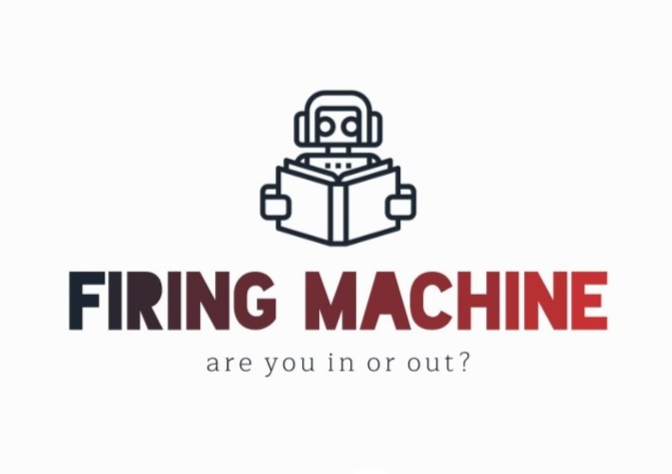

# Turnover de funcionários

## Firing Machine

## Integrantes: 
- <a href="https://www.linkedin.com/in/ana-clara-zaidan/">Ana Clara Loureiro Müller Zaidan</a>
- Daniel Quintão Dávila
- <a href="https://www.linkedin.com/in/gabriel-nascimento-b80933217/">Gabriel Metello Nascimento</a> 
- <a href="https://www.linkedin.com/in/kil-matheus-78257020a/">Kil Matheus Gomes Teixeira</a> 
- <a href="https://www.linkedin.com/in/lucas-henrique-sales-de-souza/">Lucas Henrique Sales de Souza</a>
- <a href="https://www.linkedin.com/in/mariana-silva-paula/">Mariana Silva de Paula</a> 
- <a href="https://www.linkedin.com/in/vitória-rodrigues-de-oliveira-bb955921b/">Vitória Rodrigues de Oliveira</a> 

## 📝 Descrição

<p>  O alto índice de rotatividade de funcionários é o problema cuja resolução nos foi alocada. Encontrar-la-emos via construção de algoritmo de machine learning (ML) que, após identificar padrões nos dados relacionados ao contexto da saída de funcionários da empresa, possibilitará ação imediata sobre eles: "Propor um modelo preditivo que possibilite ter a visibilidade de tendência de risco de saída dos colaboradores e desta forma contribua para ações de retenção e redução de taxa de turnover, revisitar os demais processos de carreira e de desenvolvimento" (descrição oficial da demanda).</p>
<p>  A solução proposta para o problema descrito é a construção de algoritmo de machine learning que, após identificar padrões nos dados relacionados ao contexto da saída de funcionários da empresa, melhorará o poder de decisão dos líderes da empresa. </p>

Aqui estão publicados:
- um resumo da análise de dados;
- os códigos responsáveis pelo processamento (tratamento) dos dados da tabela;
- o modelo preditivo;

Em todos os códigos, há comentários suficientes para explicar o objetivo e funcionamento da função.

# 1.0 - Importações e instalações
Começamos importando e instalando as bibliotecas necessárias para o tratamento de dados e o machine learning. Depois, importamos a própria base de dados.

In [ ]:
# !pip install dataprep 
!pip install moment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## 1.1 - Import das bibliotecas

In [ ]:
# Bibliotecas 
import pandas as pd
import datetime as dt
from datetime import date
import numpy as np
from sklearn import preprocessing
import moment

Bibliotecas para os gráficos

In [ ]:
## Bibliotecas para os gráficos
import matplotlib.pyplot as plt #geração de gráficos
import plotly.graph_objs as go 
import seaborn as sns #template de gráficos
import plotly.express as px #geração de gráficos dinâmicos
import plotly.offline as py

Bibliotecas dos modelos preditivos usados

In [ ]:
# Modelos preditivos:
from sklearn.tree import DecisionTreeClassifier, plot_tree 
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression 
from sklearn import svm 


Métricas e Ferramentas de avaliação

In [ ]:
from sklearn import metrics
# Métricas:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay # matriz de confusão
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve

# Ferramentas
from sklearn.model_selection import train_test_split # separa o dataset de teste
from sklearn.model_selection import cross_val_score , KFold # validação cruzada
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler, NearMiss, OneSidedSelection
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.datasets import make_classification
from numpy import exp, array, random, dot
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import statistics


py.init_notebook_mode(connected=True) 

## 1.2 - Importando a Base de Dados
Conectando ao google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
content_link = '/content/drive/Shareddrives/G444 Drive/docs everymind/Base Colaboradores Everymind_Inteli_2020 a 2022vModelo Preditivo.xlsx'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importando as planilhas pelo drive

IMPORTANTE: Conectamos a um drive específico nosso, se houver algum erro neste ponto, tente importar o arquivo excel aqui ou conectar a alguma nuvem por aqui.

In [ ]:
# Importando as planilhas
df1 = pd.read_excel(content_link)
df2 = pd.read_excel(content_link, sheet_name = 'Reconhecimento')
df3 = pd.read_excel(content_link, sheet_name = 'Ambiente de Trabalho 27.07')

# 2.0 - Análise Exploratória de Dados
A análise exploratória de dados é uma abordagem para analisar conjuntos de dados e resumir suas características principais, geralmente com o apoio de métodos visuais. Modelos estatísticos pode ser usado ou não, mas principalmente, este processo é para ver o que os dados podem nos dizer além da modelagem formal ou tarefa de teste de hipóteses.

## 2.1 - Descrição dos dados
Vamos ver como os dados estão dispostos, checando suas dimensões e se há dados faltantes.

In [ ]:
# visualizando suas dimensões
df1.shape

(475, 15)

In [ ]:
# visualizando a quantidade em cada linha e seu formato para cada tabela
print(' =>       Dataframe 1 - Planilha Everymind      <=  ')
df1.info()
print('---' * 20)
print('---' * 20)
print('')

print(' =>       Dataframe 2 - Planilha Reconhecimento      <=  ')
df2.info()
print('---' * 20)
print('---' * 20)
print('')

print(' =>       Dataframe 3 - Planilha Ambiente de Trabalho      <=  ')
df3.info()
print('---' * 20)
print('---' * 20)

 =>       Dataframe 1 - Planilha Everymind      <=  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475 entries, 0 to 474
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Matrícula      475 non-null    float64       
 1   Nome Completo  475 non-null    object        
 2   Dt Admissao    475 non-null    object        
 3   Dt Saida       191 non-null    datetime64[ns]
 4   Tipo Saida     191 non-null    object        
 5   Cargo          475 non-null    object        
 6   Salario Mês    475 non-null    float64       
 7   Dt Nascimento  475 non-null    datetime64[ns]
 8   Genero         475 non-null    object        
 9   Etnia          475 non-null    object        
 10  Estado Civil   475 non-null    object        
 11  Escolaridade   475 non-null    object        
 12  Estado         475 non-null    object        
 13  Cidade         475 non-null    object        
 14  Area           475 no

Com isso, nota-se que algumas colunas não estão com a tipagem certa, como a 'Dt Admissao', que deveria ser dateime64[ns] (tipo data) e está como object (tipo texto). Logo, precisamos tratar esses dados e categorizar outros dados do tipo object, como Estado.

## 2.2 - Análises estatísticas iniciais
Vamos dar uma olhada inicial nas principais estatísticas descritivas. Uma análise descritiva é um primeiro passo importante para a realização de análises estatísticas, pois nos dá uma idéia da distribuição dos nossos dados e ajuda-nos a detectar outliers.

In [ ]:
df1.describe()

,Matrícula,Salario Mês
count,475.000000,475.000000
mean,283.223158,3333.420137
std,147.244468,2466.854924
min,2.000000,500.000000
25%,159.000000,1497.412500
50%,288.000000,2690.500000
75%,409.500000,4500.000000
max,530.000000,14282.245000


Como possuímos poucos dados numéricos inicialmente, vamos cruzar algumas informações para continuar com a análise descritiva:

### 2.2.1 - Relações de reconhecimento
Esses números são úteis para termos noção das proporções dos nossos dados e possíveis relações entre eles.

Em ordem: 
- Pessoas que saíram
- Pessoas que não saíram
- Pessoas que foram reconhecidas de alguma forma
- Pessoas que não foram reconhecidas
- Pessoas que saíram e foram reconhecidas
- Pessoas que saíram e não foram reconhecidas 

In [ ]:
# Pessoas que saíram: ✔
pessoas_desativadas = df1.dropna(subset=['Dt Saida'])['Nome Completo'].unique()
qtd_desativados = len(pessoas_desativadas)
qtd_desativados

189

In [ ]:
# Pessoas que não saíram: ✔
pessoas_ativas = df1.query('`Dt Saida` == ""')['Nome Completo'].unique()
len(pessoas_ativas)

284

In [ ]:
# Pessoas que foram reconhecidas de alguma forma: ✔
pessoas_reconhecidas = df2['Codinome'].unique()
len(pessoas_reconhecidas)

173

In [ ]:
# Pessoas que não foram reconhecidas: ✔
lista_pessoas = df1['Nome Completo'].unique()
pessoas_sem_reconhecimento = []
for i in range(0, len(lista_pessoas)):
  if lista_pessoas[i] in pessoas_reconhecidas:
    continue
  else:
    pessoas_sem_reconhecimento.append(lista_pessoas[i])
len(pessoas_sem_reconhecimento)

298

In [ ]:
# Pessoas que não foram reconhecidas e saíram:
pessoas_desativadas_sem_reconhecimento = []
for pessoa in pessoas_desativadas:
  if pessoa in pessoas_reconhecidas:
    continue
  else:
    pessoas_desativadas_sem_reconhecimento.append(pessoa)
print(len(pessoas_desativadas_sem_reconhecimento))

127


In [ ]:
  # Pessoas que foram reconhecidas e saíram ✔
pessoas_desativadas_reconhecidas = df2.query('`Situação` == "Desligado"')['Codinome'].unique()
len(pessoas_desativadas_reconhecidas)

62

### 2.2.2 - Gênero
Uma hipótese inicial foi a de que o gênero pode impactar o modelo de alguma forma, por isso, vamos separar alguns números importantes e, com o apoio de gráficos, concluir se podemos ou não validar essa hipótese.

In [ ]:
gen_total = df1.groupby(['Genero']).count()
gen_total

,Matrícula,Nome Completo,Dt Admissao,Dt Saida,Tipo Saida,Cargo,Salario Mês,Dt Nascimento,Etnia,Estado Civil,Escolaridade,Estado,Cidade,Area
Genero,,,,,,,,,,,,,,
Feminino,112,112,112,35,35,112,112,112,112,112,112,112,112,112
Masculino,363,363,363,156,156,363,363,363,363,363,363,363,363,363


In [ ]:
gen_total_masc = gen_total.iloc[0, 1]
gen_total_masc

112

In [ ]:
gen_total_fem = gen_total.iloc[1, 1]
gen_total_fem

363

In [ ]:
gen_masc_left = gen_total.iloc[0, 4]
gen_masc_left

35

In [ ]:
gen_fem_left = gen_total.iloc[1, 4]
gen_fem_left

156

In [ ]:
gen_fem_prop = (gen_fem_left/gen_total_fem)*100
gen_fem_prop

42.97520661157025

In [ ]:
gen_masc_prop = (gen_masc_left/gen_total_masc)*100
gen_masc_prop

31.25

Porcentagem de saídas em gênero 

Text(0.5, 1.0, 'Desligamentos x Gênero (proporcionalmente)')

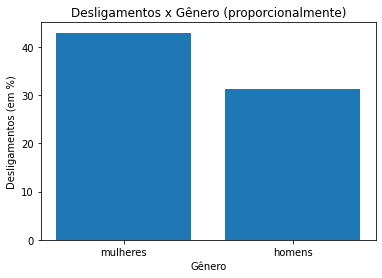

In [ ]:
gen_x = ['mulheres', 'homens']
gen_y = [gen_fem_prop, gen_masc_prop]

plt.bar(gen_x, gen_y)

plt.xlabel('Gênero')
plt.ylabel('Desligamentos (em %)')
plt.title('Desligamentos x Gênero (proporcionalmente)')

# 3.0 - Preparação dos Dados
O tratamedo de dados é a abordagem mais importante para o modelo preditivo em vista da análise de dados feita anteriormente. Aqui faremos a manutenção dos tipos que estão incorretos. Além disso, como o modelo preditivo em si apenas avalia dados numéricos, vamos transformar todas as colunas de texto em números a partir de estratégias e métodos explicados em cada tópico.

Resumo da seção:

- Manutenção de types
- Categorização
  - Dicionário dos dados
- Derivação

## 3.1 - Manutenção de types

Como visto na análise exploratória de dados (tópico 2), algumas variáveis vieram com os tipos errados ou inconsistentes. Neste tópico vamos consertar esses dados e transformá-los corretamente em variáveis utilizáveis para continuar o tratamento.

Resumo do tópico:

- Eliminiação de espaços e outros obstáculos
- Tipificação de dados (como datas em string para datetime)

### 3.1.1 - Eliminações

Alguns fatores são importantes serem retirados, como os espaços e outros textos não relevantes, como o "Pessoa Colaboradora" das features 'Codinome' (df2) e 'Pessoa Colaboradora' (df1).

#### 3.1.1.1 - Espaços

Eliminamos os espaços nas tabelas pois eles não nos são pertinentes visando o tratamento que se segue.

In [ ]:
# Aqui percorremos todas as linhas das colunas e fazer a alteração de onde possui espaço em branco e substituir para vazio 
# (percorremos apenas linhas em string, por isso o argumento 'object' e o atributo str)
for i in df1.select_dtypes(include = 'object').columns.drop('Dt Admissao'):
  df1[i] = df1[i].str.replace(' ','')

In [ ]:
for i in df2.select_dtypes(include = 'object'):
  df2[i] = df2[i].str.replace(' ','')

#### 3.1.1.2 - Pessoa Colaboradora

Eliminamos os textos "PessoaColaboradora" nas tabelas pois eles não nos são pertinentes visando o tratamento que se segue.

In [ ]:
# Aqui substituímos o texto de "PessoaColaboradora" de todas as linhas da coluna 'Nome Completo' por vazio 
# (isso tem como objetivo obter apenas o número do colaborador)
for i in range(0, len(df1['Nome Completo'])):
  df1['Nome Completo'][i] = df1['Nome Completo'][i].replace('PessoaColaboradora', '')
  int(df1['Nome Completo'][i])
  
for i in range(0, len(df2['Codinome'])):
  df2['Codinome'][i] = df2['Codinome'][i].replace('PessoaColaboradora', '')
  int(df2['Codinome'][i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### 3.1.2 - Renomeação de coluna

A renomeação de colunas é importante para evitar a confusão quando formos tratar alguma feature a partir da matrícula de um colaborador, por exemplo (já que estão escritas de forma muito semelhante, diferenciando-se apenas pelo acento). 

In [ ]:
df1 = df1.rename(columns={'Matrícula': 'Matricula'})

### 3.1.3 - Datas

Como visto na análise de types, algumas datas estão como 'object' (texto), precisamos trocar o tipo dessas features pois elas são importantes para a derivação de outras variáveis futuramente.

#### 3.1.3.1 - Dados vazios

Como as pessoas ativas não possuem uma 'data de saída' da empresa, vamos utilizar a data hodierna para essas pessoas possuírem esse tipo de data e podermos calcular algumas coisas importantes (como a estagnação, por exemplo).

In [ ]:
df1['Dt Saida'] = df1['Dt Saida'].replace(np.NaN, pd.to_datetime('today'))

#### 3.1.3.2 - Manutenção dos types das datas

Agora sim podemos passar o type das datas de 'object'/'string' para 'date' no primeiro dataframe (df1)

In [ ]:
# O for percorre as linhas de 0 até a quantidade de linhas presente na coluna "Dt Admissao"
for i in range(0, len(df1['Dt Admissao'])):
  #Passa por cada linha das colunas selecionadas e troca a formatação do conteúdo que está lá pelo formato indicado
  #remoção das horas das datas e troca as / por -
  df1['Dt Admissao'][i] = str(df1['Dt Admissao'][i]).replace('00:00:00', '').replace('/', '-')
  df1['Dt Saida'][i] = str(df1['Dt Saida'][i]).replace('00:00:00', '').replace('/', '-')
  #Padronização de todos os dados para o formato (ano, mês, dia)
  df1['Dt Admissao'][i] = moment.date(df1['Dt Admissao'][i]).format("YYYY-MM-DD")
  df1['Dt Saida'][i] = moment.date(df1['Dt Saida'][i]).format("YYYY-MM-DD")
# No fim, mudamos a tipagem das duas variáveis para datetime com formato apenas de data
df1['Dt Admissao'] = pd.to_datetime(df1['Dt Admissao'], format="%Y/%m/%d")
df1['Dt Saida'] = pd.to_datetime(df1['Dt Saida'], format="%Y/%m/%d")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying t

## 3.2 - Variáveis Categóricas
Aqui categorizamos as variáveis com valores não numéricos para numérico, para viabilizar o uso dessas variáveis no modelo preditivo.

### 3.2.1 - Label Encoding

Em resumo, o Label Encoder é uma excelente ferramenta para converter variáveis categóricas que possuem alguma relação de ordem, no entanto não é indicado para variáveis que não possuem tal relação devido a possibilidade de introduzir problemas no modelo.

Basicamente esse método atribui cada valor único de uma coluna a um número.

Nesse sentido, a técnica de label encoding foi, inicialmente, aplicada no projeto, mas pelo contexto e pela lógica, decidimos descartar os tratamentos feitos com esse método, e aplicar, ao invés do label encoding, o método de "One Hot Encoding" nas variáveis categoricas, que será melhor desenvolvido na seção 3.2.2 deste material.

Porém, optamos por manter o código dessa seção (3.2.1) no notebook, visto que algumas das variáveis criadas a partir desse método estão sendo utilizadas no cruzamento de novas features.

In [ ]:
# Para aplicar, basta apenas aplicar o código abaixo,
# substituindo o nome 'coluna' pela coluna que desejamos atribuir o label encoder.

#DataFrame['coluna_nova'] = preprocessing.LabelEncoder().fit_transform(DataFrame['coluna'])

#### Dicionário das features numéricas
Este é o dicionário dos valores numéricos que serão tratados na seção 3.2.1, e cada tópico contém, respectivamente, o número da coluna numérica e o seu significado (em relação à coluna que derivou a numérica).

Na categorização de dados, criamos:
- Genero Numérico (df1):
  - 0 = masculino
  - 1 = feminino
- Tipo Saída Numérico (df1):
  - 0 = ativo
  - 1 = rescisão de contrato por pedido de demissão
  - 2 = rescisão de contrato por demissão
  - 3 = demissão
  - 4 = pedido de demissão
- Regiões (df1):
  - 1 = região Norte
  - 2 = região Nordeste
  - 3 = região Centro-Oeste
  - 4 = região Sudeste
  - 5 = região Sul
- Situação (df2):
  - 0 = desativo
  - 1 = ativo ou afastado
- Status (df1):
  - 0 = desativo
  - 1 = ativo 
- Salário Comparado (df1):
  - 0 = o salário do colaborador está igual ou maior à média salarial do seu cargo
  - 1 = o salário da colaborador é menor do que a média salarial do seu cargo
- Faixa etária (df1):
  - 0 = entre 18 e 21
  - 1 = entre 22 e 25
  - 2 = entre 26 e 29
  - 3 = entre 30 e 33
  - 4 = entre 34 e 37
  - 5 = entre 38 e 41
  - 6 = entre 42 e 45
  - 7 = entre 46 e 49
  - 8 = entre 50 e 65
- Estado SP (df1): 
  - 0 = mora fora de SP
  - 1 = mora em SP
- Estado Civil (df1):
  - 0 = solteiros, divorciados e separados
  - 1 = casados e união estável
- Area_num (df1):
  - 0 = AMS
  - 1 = AgenciaDigital
  - 2 = Analytics
  - 3 = BAC
  - 4 = BPM
  - 5 = BestMinds
  - 6 =  CPG&Retail
  - 7 = CPG&RetailI
  - 8 = CPG&RetailII
  - 9 = Commerce
  - 10 = Core&Industrias
  - 11 = Core&IndustriasI
  - 12 = Core&IndustriasII
  - 13 = Diretoria
  - 14 = Education
  - 15 = Financeiro
  - 16 = Infraestrutura
  - 17 = Integration
  - 18 = MktCloud
  - 19 = PS
  - 20 = People
  - 21 = Produtos
  - 22 = Vendas
- Cidades (df1)
    - 112 = SãoPaulo
    - 74 = Osasco
    - 107 = SãoBernardodoCampo
    - 45 = Guarulhos
    - 101 = SantoAndré
    - 105 = Sorocaba
    - 68 = MogidasCruzes
    - 61 = Londrina
    - 85 = PraiaGrande
    - 62 = Mafra
    - 7 = Barueri
    - 9 = BeloHorizonte
    - 89 = Recife
    - 66 = Mauá
    - 30 = Curitiba
    - 21 = Carapicuíba
    - 55 = Itaquaquecetuba
    - 94 = RiodeJaneiro
    - 38 = Fortaleza                
    - 31 = Diadema                  
    - 29 = Cotia                    
    - 102 = Santos                  
    - 59 = Jundiaí                  
    - 116 = Uberlândia              
    - 114 = TaboãodaSerra           
    - 12 = Brasília                 
    - 106 = Suzano                  
    - 100 = SantanadeParnaíba       
    - 80 = Pelotas                  
    - 57 = JoãoPessoa               
    - 113 = SãoVicente              
    - 46 = Hortolândia              
    - 96 = Salvador                 
    - 10 = Belém                    
    - 37 = Florianópolis            
    - 86 = PresidentePrudente       
    - 77 = Paulista                 
    - 78 = Paulínia                 
    - 70 = Niterói                  
    - 26 = Concórdia               
    - 4 = Atibaia                  
    - 60 = Limeira                 
    - 1 = Alfenas                  
    - 84 = Poá                      
    - 108 = SãoCaetanodoSul          
    - 17 = Campinas                 
    - 53 = ItapecericadaSerra       
    - 54 = Itapevi                  
    - 16 = Camaragibe               
    - 15 = Caieiras                 
    - 93 = RioNegro                 
    - 39 = Franca                   
    - 32 = Divinópolis              
    - 90 = RibeirãoPires            
    - 82 = Piracicaba               
    - 76 = Patos                    
    - 97 = SantaBárbaraD'Oeste      
    - 75 = Palmital                 
    - 110 = SãoJosé                 
    - 79 = PedroLeopoldo       
    - 117 = Unaí                  
    - 103 = Sertãozinho           
    - 81 = Pindamonhangaba        
    - 115 = Taubaté               
    - 83 = PortoAlegre            
    - 104 = Sobral                
    - 95 = Salgado                
    - 111 = SãoLourenço            
    - 92 = RioGrande              
    - 109 = SãoCristóvão           
    - 98 = SantaMariadaVitória    
    - 91 = RibeirãoPreto          
    - 87 = Promissão              
    - 88 = RafaelFernandes        
    - 99 = SantaMariadoPará      
    - 0 = Abaetetuba             
    - 73 = NovoHamburgo           
    - 19 = CampoLimpoPaulista     
    - 33 = DoisVizinhos           
    - 28 = Contagem               
    - 27 = Congonhas             
    - 25 =Colombo                
    - 24 = Charqueadas            
    - 23 = Caucaia                
    - 22 = Catanduvas             
    - 20 = Canoas                 
    - 18 = CampoGrande            
    - 35 = Erechim                
    - 14 = Cabreúva               
    - 13 = Cabedelo               
    - 11 = BragançaPaulista      
    - 8 = BelaVistadeGoiás       
    - 6 = BalneárioCamboriú      
    - 5 = Bacabal                
    - 3 = Anápolis               
    - 2 = Ananindeua             
    - 34 = Embu-Guaçu             
    - 36 = Eusébio                
    - 72 = NovaLima               
    - 52 = Itanhaém               
    - 71 = NovaIguaçu             
    - 69 = Navegantes             
    - 67 = MogiMirim              
    - 65 = Maringá                
    - 64 = Maricá                 
    - 63 = Mairiporã              
    - 58 = JuazeirodoNorte        
    - 56 = Jandira                
    - 51 = Itaiópolis             
    - 40 = FranciscoBeltrão       
    - 50 = Ipanema                
    - 49 = Indaiatuba             
    - 48 = Igarassu               
    - 47 = Igarapé                
    - 44 = Guaiçara               
    - 43 = Guaimbê                
    - 42 = Garanhuns              
    - 41 = FranciscoMorato        
    - 118 = Vinhedo                   

#### 3.2.1.1 - Gênero
Criação da variável 'Genero_Numerico', a partir da coluna 'Genero', na df1

In [ ]:
# Categorização do gênero dos funcionários
# 0 significa Masculino
# 1 significa Feminino
df1['Genero_Numerico'] = (df1['Genero']
                          .replace('Masculino', 0)
                          .replace('Feminino', 1))

#### 3.2.1.2 - Tipo Saida
Tipo de saída da empresa por ordem de relevância (em que o pedido de demissão é mais importante) - na df1

In [ ]:

# Categorização do tipo de saída dos funcionários
# 0 significa ativo
# 1 significa rescizão de contrato por pedido de demissão
# 2 significa rescisão de contrato por demissão
# 3 significa demissão
# 4 significa pedido de demissão
df1['Tipo_Saida_Numerico'] = (df1['Tipo Saida']
                              .fillna(0)
                              .replace('RescisaoContratoExp-Dispensa', 1)
                              .replace('RescisaoContratoExp-Pedido', 2)
                              .replace('DispensasemJustaCausa', 3)
                              .replace('PedidodeDemissão', 4))

#### 3.2.1.3 - Estado e Região
Criação das variáveis 'Estado_numerico' e 'Regiao_Numerico', ambas a partir da variável 'Estado', na df1

Criação do 'Estado_Numerico':

In [ ]:
# Categorização dos Estados para futuros cruzamentos de dados
df1['Estado_Numerico'] = preprocessing.LabelEncoder().fit_transform(df1['Estado'])

Criação do 'Regiao':

In [ ]:
df1['Regiao'] = (df1['Estado']
                       # Norte
                       .replace('AM', 'norte')
                       .replace('RR', 'norte')
                       .replace('AC', 'norte')
                       .replace('RO', 'norte')
                       .replace('AP', 'norte')
                       .replace('PA', 'norte')
                       .replace('TO', 'norte')
                       # Nordeste
                       .replace('MA', 'nordeste')
                       .replace('CE', 'nordeste')
                       .replace('PI', 'nordeste')
                       .replace('RN', 'nordeste')
                       .replace('PB', 'nordeste')
                       .replace('PE', 'nordeste')
                       .replace('AL', 'nordeste')
                       .replace('SE', 'nordeste')
                       .replace('BA', 'nordeste')
                       # Centro
                       .replace('MS', 'centro')
                       .replace('GO', 'centro')
                       .replace('DF', 'centro')
                       .replace('MT', 'centro')
                       # Sudeste
                       .replace('MG', 'sudeste')
                       .replace('ES', 'sudeste')
                       .replace('RJ', 'sudeste')
                       .replace('SP', 'sudeste')
                       # Sul
                       .replace('PR', 'sul')
                       .replace('SC', 'sul')
                       .replace('RS', 'sul')
                       )

Criação do 'Regiao_Numerico':

In [ ]:
# Categorização das Regiões (agrupando os Estados)
# '1' para Norte
# '2' para Nordeste
# '3' para Centro-Oeste
# '4' para Sudeste
# '5' para Sul
df1['Regiao_Numerico'] = (df1['Estado']
                       # Norte
                       .replace('norte', 1)
                       # Nordeste
                       .replace('nordeste', 2)
                       # Centro
                       .replace('centro', 3)
                       # Sudeste
                       .replace('sudeste', 4)
                       # Sul
                       .replace('sul', 5)
                       )

#### 3.2.1.4 - Cargo
Criação da variável 'Cargo_Numerico', a partir da coluna 'Cargo', na df1

In [ ]:
# Categorização dos Cargos para futuros cruzamentos de dados
df1['Cargo_Numerico'] = preprocessing.LabelEncoder().fit_transform(df1['Cargo'])

####3.2.1.5 - Área
Antes de aplicar o Label Enconding na 'Area' dos colaboradores, na df1, precisamos atualizar as Areas dos colaborados em relação à 'Area' da df3.

##### 3.2.1.5.1 - Agrupamento de áreas da df1
Como visto na análise de dados, as Áreas da df3 - tabela de Ambiente de Trabalho da Everymind- não estão iguais às da df1, por isso, vamos agrupar as áreas da df1, para coincidir com as da df3.

In [ ]:
#transfromação das áreas, da tabela 1 para a tabela 3
#Agrupa as áreas pelas áreas que correspondem na tabela 3 e cria uma coluna com elas na tabela 1 
df1['Area_Agrupada'] = (df1['Area']
                              .replace('Core&IndustriasI', "Core&Industrias")
                              .replace('Core&IndustriasII', "Core&Industrias")
                              .replace('CPG&RetailII ', "CPG&Retail")
                              .replace('CPG&RetailI', "CPG&Retail")
                              .replace('AMS', "AMS&PS")
                              .replace('PS ', "AMS&PS")
                              .replace('Analytics', "Analytics&Integration")
                              .replace('Integration', "Analytics&Integration")
                              .replace('MktCloud', "MktCloud")
                              .replace('AgenciaDigital', "MktCloud")
                              .replace('Commerce', "Commerce")
                              .replace('Vendas', "Vendas" )
                              .replace('Produtos', "Everymind")
                              .replace('People', "People&Culture")
                              .replace('BAC', "Everymind")
                              .replace('Education', "Everymind")
                              .replace('BestMinds', "Everymind")
                              .replace('Diretoria', "Everymind")
                              .replace('BPM', "Everymind")
                              .replace('Infraestrutura', "Everymind")
                              .replace('Financeiro', "Everymind"))

##### 3.2.1.5.2 - Agrupamento de áreas na df3

In [ ]:
df3['Divisao_agrupada'] = (df3['Divisao'].replace('Core & Industrias I', 'Core&Industrias')
                                         .replace('Core & Industrias II', 'Core&Industrias')
                                         .replace('CPG & Retail II', 'CPG&Retail')
                                         .replace('CPG & Retail I', 'CPG&Retail')
                                         .replace('Analytics & Integration', 'Analytics&Integration')
                                         .replace('People & Culture', 'People&Culture')
                                         .replace('Mkt Cloud', 'MktCloud'))

##### 3.2.1.5.3 - Label encoding na Area da df1

In [ ]:
df1['Area_numerico'] = preprocessing.LabelEncoder().fit_transform(df1['Area_Agrupada'])

####3.2.1.6 - Cidade
Criação da variável 'Cidade_numerico', a partir da coluna 'Cidade', na df1

In [ ]:
df1['Cidade_numerico'] = preprocessing.LabelEncoder().fit_transform(df1['Cidade'])

####3.2.1.7 - Estado Civil
Criação da variável 'ECivil_numerico', a partir da coluna 'Estado Civil', na df1. É importante apontar que decidimos por agrupar os valores 'UniãoEstável', 'Divorciado' e 'Separado' ao valor 'Casado', visto que esses 3 primeiros valores têm uma frequência muito insignificante.

Nesse sentido, esse critério de agrupamento parte da hipótese de que pessoas com pessoas dependentes financeiramente a elas (esposos ou filhos), tendem a querer maior estabilidade no emprego, tendo menor tendencia a sair. Com isso, acreditamos que pessoas nas situações citadas a cima tem mais chance de terem filhos, por exemplo.


In [ ]:
df1['Estado Civil'].value_counts()

Solteiro        342
Casado          114
Divorciado       14
UniãoEstável      3
Separado          2
Name: Estado Civil, dtype: int64

In [ ]:
df1['ECivil_Agrupado'] = (df1['Estado Civil']
                      .replace('UniãoEstável', 'Casado')
                      .replace('Divorciado', 'Casado')
                      .replace('Separado', 'Casado'))

In [ ]:
# Categorização do estado civil (EC)
# '0' para Solteiros
# '1' para Casados
df1['ECivil_Numerico'] = (df1['ECivil_Agrupado']
                      .replace('Casado', 1)
                      .replace('Solteiro', 0))

In [ ]:
df1['ECivil_Numerico'].value_counts()

0    342
1    133
Name: ECivil_Numerico, dtype: int64

####3.2.1.8 - Situação
Categorização da coluna 'Situação' dos colaboradores, na df2

In [ ]:
# Categorização da situação dos funcionários
# 0 significa que o funcionário foi desligado
# 1 significa que o funcionário está ativo
df2['Situação_Numerico'] = (df2['Situação']
                          .replace('Desligado', 0)
                          .replace('Ativo', 1)
                          .replace('Afastado',1))

#### 3.2.1.9 - LabelEncoder geral no df2
No segundo dataframe (df2), aplicamos o label encoder nas variáveis que serão utilizadas no modelo:

In [ ]:
#Substituindo os valores das colunas da tabela 2 por valores numéricos
for column in df2.drop(['Data de Admissão',	'Data Vigência', 'Novo Salario', 'Codinome', 'Matricula', 'Situação', 'Situação_Numerico'], axis=1):
  df2[f'{column}_Numerico'] = preprocessing.LabelEncoder().fit_transform(df2[column])

In [ ]:
df2.columns

Index(['Matricula', 'Codinome', 'Situação', 'Data de Admissão',
       'Data Vigência', 'Novo Cargo', 'Novo Salario', 'Motivo',
       'Alterou Função', 'Situação_Numerico', 'Novo Cargo_Numerico',
       'Motivo_Numerico', 'Alterou Função_Numerico'],
      dtype='object')

### 3.2.2 - One Hot Encoding

Ao aplicar em novos dados, o método OneHotEncoder() irá construir todas as colunas que foram geradas no treinamento atribuindo valor 0 ou 1, dependendo da presença ou ausência da característica, respectivamente. Nesse sentido, esse método é ideal para utilizar em modelos de machine learning.

In [ ]:
# Para aplicar, basta apenas aplicar o código abaixo,
# substituindo o nome 'coluna' pela coluna que será alvo do one hot encoder.


**Converte** a variável categórica em variáveis ​​fictícias/indicadoras, ou seja, em outras features onde retorna 0 quando a linha for falsa, e 1 quando ela for verdade.

In [ ]:
df1.columns

Index(['Matricula', 'Nome Completo', 'Dt Admissao', 'Dt Saida', 'Tipo Saida',
       'Cargo', 'Salario Mês', 'Dt Nascimento', 'Genero', 'Etnia',
       'Estado Civil', 'Escolaridade ', 'Estado', 'Cidade', 'Area',
       'Genero_Numerico', 'Tipo_Saida_Numerico', 'Estado_Numerico', 'Regiao',
       'Regiao_Numerico', 'Cargo_Numerico', 'Area_Agrupada', 'Area_numerico',
       'Cidade_numerico', 'ECivil_Agrupado', 'ECivil_Numerico'],
      dtype='object')

In [ ]:
# Essas linhas criam vários DataFrames que irão guardar dados. Ele vai gerar
# um única coluna que vai retornar todas as
# informação('Cargo', 'Area', 'Estado' ou 'ECivil_Numerico')
# que pertencem de todos os funcionários.

dado_cargos = pd.DataFrame(df1, columns=["Cargo"])
dado_area = pd.DataFrame(df1, columns=["Area_Agrupada"])
dado_estado = pd.DataFrame(df1, columns=["Estado"])
dado_ecivil = pd.DataFrame(df1, columns=["ECivil_Agrupado"])
dado_gen = pd.DataFrame(df1, columns=['Genero'])
dado_city = pd.DataFrame(df1, columns=['Cidade'])
dado_regiao = pd.DataFrame(df1, columns=['Regiao'])
dado_escola = pd.DataFrame(df1, columns=['Escolaridade'])

In [ ]:
df1.columns

Index(['Matricula', 'Nome Completo', 'Dt Admissao', 'Dt Saida', 'Tipo Saida',
       'Cargo', 'Salario Mês', 'Dt Nascimento', 'Genero', 'Etnia',
       'Estado Civil', 'Escolaridade ', 'Estado', 'Cidade', 'Area',
       'Genero_Numerico', 'Tipo_Saida_Numerico', 'Estado_Numerico', 'Regiao',
       'Regiao_Numerico', 'Cargo_Numerico', 'Area_Agrupada', 'Area_numerico',
       'Cidade_numerico', 'ECivil_Agrupado', 'ECivil_Numerico'],
      dtype='object')

In [ ]:
# Quando utilizamos o Dummies, ele vai tranformar um dado de uma célula em uma coluna,
# e verifica se aquele antigo dado que pertencia naquela linha é verdadeiro. 
# Se sim, ele retorna 1 senão 0.

dummie_cargos = pd.get_dummies(dado_cargos["Cargo"])
dummie_area = pd.get_dummies(dado_area["Area_Agrupada"])
dummie_estado = pd.get_dummies(dado_estado["Estado"])
dummie_ecivil = pd.get_dummies(dado_ecivil["ECivil_Agrupado"])
dummie_genero = pd.get_dummies(dado_gen['Genero'])
dummie_city = pd.get_dummies(dado_city['Cidade'])
dummie_regiao = pd.get_dummies(dado_regiao['Regiao'])
dummie_escola = pd.get_dummies(dado_escola['Escolaridade'])

####3.2.2.1 - Criação do dataframe 'cat_df'
Esse dataframe contém todas as features categóricas que utilizaremos, com one hot encoding aplicado.

In [ ]:
# Após o tratamento dos dados, nós juntamos todas os Dummies tratados acima,
# junto com as features que retornam o melhor desempenho nos modelos após
# testes de variáveis e auxílio da matriz de correlação.
cat_df = pd.DataFrame()
cat_df = pd.concat([cat_df, dummie_cargos], axis = 1)
cat_df = pd.concat([cat_df, dummie_area], axis = 1)
cat_df = pd.concat([cat_df, dummie_estado], axis = 1)
cat_df = pd.concat([cat_df, dummie_ecivil], axis = 1)
cat_df = pd.concat([cat_df, dummie_genero] , axis = 1)
# cat_df = pd.concat([cat_df, dummie_city] , axis = 1)
cat_df = pd.concat([cat_df, dummie_regiao], axis = 1)
cat_df = pd.concat([cat_df, dummie_escola], axis = 1)

In [ ]:
cat_df.columns

Index(['Arquiteto', 'ArquitetoSr', 'AssistenteI', 'AssistenteII',
       'AuxiliardeLimpeza', 'ComercialIS', 'ComercialPl', 'Consultor',
       'DevEspecialista', 'DevJr', 'DevPl', 'DevSr', 'Diretor', 'EducaçãoPl',
       'Estagiaria', 'FinanceiroJr', 'FuncionalEspecialista', 'FuncionalJr',
       'FuncionalPl', 'FuncionalSr', 'Gerente', 'GerenteCSSr', 'GerentePV',
       'GerenteSr', 'GerenteVendasI', 'GerenteVendasII', 'GerenteVendasIII',
       'InfraestruturaJr', 'MarketingPL', 'PessoasPl', 'ScrumMasterJr',
       'TesteJr', 'TesteSr', 'Trainee-Dev', 'Trainee-Funcional',
       'VicePresidente', 'AMS&PS', 'Analytics&Integration', 'CPG&Retail',
       'CPG&RetailII', 'Commerce', 'Core&Industrias', 'Everymind', 'MktCloud',
       'PS', 'People&Culture', 'Vendas', 'BA', 'CE', 'DF', 'GO', 'MA', 'MG',
       'MS', 'PA', 'PB', 'PE', 'PR', 'RJ', 'RN', 'RS', 'SC', 'SE', 'SP',
       'Casado', 'Solteiro', 'Feminino', 'Masculino', 'centro', 'nordeste',
       'norte', 'sudeste', 'sul'],
    

In [ ]:
cat_df.head(5)

,Arquiteto,ArquitetoSr,AssistenteI,AssistenteII,AuxiliardeLimpeza,ComercialIS,ComercialPl,Consultor,DevEspecialista,DevJr,...,SP,Casado,Solteiro,Feminino,Masculino,centro,nordeste,norte,sudeste,sul
0,0,0,0,0,0,0,0,0,0,0,...,1,1,0,1,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0,...,1,0,1,0,1,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,0,0,1,0
3,0,1,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,0,0,1,0


## 3.3 - Derivação
Aqui criamos algumas variáveis a partir do cruzamento de variáveis já existentes, levando em conta hipóteses levantadas na análise exploratória de dados.

### 3.3.1 - Status
Este será o nosso "target" do modelo preditivo. Relacionada ao dataframe principal (df1), 'Status' reflete justamente se o colaborador está na empresa ou não, sendo 0 que ele não está e 1 quando ele ainda está ativo.

-> Essa feature foi criada a partir da coluna 'Tipo Saida' da df1

In [ ]:
# Criação da coluna status, onde 
# "0" é "desativo" 
# "1" é "ativo"
df1['Status'] = (df1['Tipo Saida']
                              .fillna(1)
                              .replace('RescisaoContratoExp-Dispensa', 0)
                              .replace('RescisaoContratoExp-Pedido', 0)
                              .replace('DispensasemJustaCausa', 0)
                              .replace('PedidodeDemissão', 0))

### 3.3.2 - Média Salarial e Salário Comparado
'Media_Salarial': feature que diz qual a média salarial do cargo daquele colaborador na empresa; 
-> criada a partir do calculo da média dos salarios da coluna 'Salario Mês' para cada cargo da df1.

'Salario_Comparado': feature que retorna se o valor do 'Salario Mês' do colaborador está a cima ou abaixo do valor da 'Media_Salarial' referente ao seu cargo.
-> criada também na df1 

Quando o indivíduo possui um salário menor do que a média, o salário comparado recebe '1', quando está acima ou igual à média, o salário comparado recebe '0'.

In [ ]:
df1['Media_Salarial'] = -1

for i in range(0, len(df1)):
  Cargo_da_pessoa = df1['Cargo_Numerico'][i]
  df1['Media_Salarial'][i] = df1.query(f'`Cargo_Numerico` == {Cargo_da_pessoa}').mean()['Salario Mês']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df1['Salario_Comparado'] = 0

for item in range(0,len(df1)):
    if df1['Media_Salarial'][item] > df1['Salario Mês'][item]:
        df1['Salario_Comparado'][item] = 1  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



A variavel categorica 'Salario_Comparado', da df1,  não precisa de one hot encoding, mas deve ser adicionada ao dataframe 'cat_df'

In [ ]:
dado_salcomp = pd.DataFrame(df1, columns=['Salario_Comparado']) 

In [ ]:
dado_salcomp

,Salario_Comparado
0,0
1,1
2,0
3,0
4,0
...,...
470,1
471,1
472,1
473,1


In [ ]:
cat_df = pd.concat([cat_df, dado_salcomp], axis = 1)

In [ ]:
cat_df.head(3)

,Arquiteto,ArquitetoSr,AssistenteI,AssistenteII,AuxiliardeLimpeza,ComercialIS,ComercialPl,Consultor,DevEspecialista,DevJr,...,Casado,Solteiro,Feminino,Masculino,centro,nordeste,norte,sudeste,sul,Salario_Comparado
0,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,1,0,1,0,0,0,1,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0


### 3.3.3 - Tempo de trabalho
Essa feature mede quanto tempo o colaborador desativado ficou na empresa e há quanto tempo os colaboradores estão ativos. Dessa forma, esse cálculo é feito a partir da subtração entre o valor da 'Dt Saida' e a 'Dt Admissao', ou entre o dia de hoje e a 'Dt Admissao', respectivamente.

-> Esta feature está situada na df1

In [ ]:
#Função pega a data de admissão do colaborador e a data do seu desligamento, e encontra o perído entre elas.
df1['Tempo_de_Trabalho'] = ((df1['Dt Saida'] - df1['Dt Admissao'])/ np.timedelta64(1, 'D')).astype(int)

### 3.3.4 - Idade
A variável idade foi criada a partir da coluna 'Dt Nascimento', através do calculo de subtração entre a data de hoje e a data de nascimento, na df1.

In [ ]:
#Ele pega a data de hoje e subtrai da data de nascimento, retornando a idade, np.timedelta64, transforma o retorno da data de dias para ano.
df1['Idade'] = ((pd.to_datetime('today')-pd.to_datetime(df1['Dt Nascimento']))/ np.timedelta64(1, 'Y')).astype(int)

### 3.3.5 - Faixa Etária
A Faixa Etária foi criada a partir da variável 'Idade' e é um pouco mais categorizada, pois agrupa as idades de 4 em 4 anos.

-> Essa coluna foi criada na df1

In [ ]:
df1['Faixa_Etaria'] = 0
for i in range(0, len(df1)):
    if df1['Idade'][i] >= 18 and  df1['Idade'][i] <= 21:
        df1['Faixa_Etaria'][i] = 0
    elif df1['Idade'][i] >= 22 and  df1['Idade'][i] <= 25:
        df1['Faixa_Etaria'][i] = 1
    elif df1['Idade'][i] >= 26 and  df1['Idade'][i] <= 29:
        df1['Faixa_Etaria'][i] = 2
    elif df1['Idade'][i] >= 30 and  df1['Idade'][i] <= 33:
        df1['Faixa_Etaria'][i] = 3
    elif df1['Idade'][i] >= 34 and  df1['Idade'][i] <= 37:
        df1['Faixa_Etaria'][i] = 4
    elif df1['Idade'][i] >= 38 and  df1['Idade'][i] <= 41:
        df1['Faixa_Etaria'][i] = 5
    elif df1['Idade'][i] >= 42 and  df1['Idade'][i] <= 45:
        df1['Faixa_Etaria'][i] = 6
    elif df1['Idade'][i] >= 46 and  df1['Idade'][i] <= 49:
        df1['Faixa_Etaria'][i] = 7
    elif df1['Idade'][i] >= 50 and  df1['Idade'][i] <= 65:
        df1['Faixa_Etaria'][i] = 8


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is tryi

### 3.3.6 - Período de estagnação de reconhecimento
O período de estagnação é o tempo, em dias, entre o ultimo reconhecimento recebido por um colaborador (mérito ou promoção), e o dia de hoje (se ele for ativo), ou a data de demissão (se ele estiver desativo). Ou seja, representa ha quanto tempo a pessoa está sem receber um reconhecimento.

####3.3.6.1 - Integração da 'Dt Saida' na df2

Primeiro, colocamos a 'Dt Saida' da df1 na df2, para tornar possivel o calculo da estagnação de quem ja saiu da empresa.

In [ ]:
#colocamos esse valor inicial apenas para definir a tipagem da variavel como datetime
df2['Dt Saida'] = pd.to_datetime('today')

contador = 0
for matricula in df2['Matricula']:
    if matricula in df1['Matricula'].values:
        cont = 0
        for mat in df1['Matricula']:
            if mat == matricula:
                df2['Dt Saida'][contador] = df1['Dt Saida'][cont]
            cont+=1
    contador+=1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



####3.3.6.2 - Estagnação na df2

Agora, criaremos a variável 'Estagnação' na df2,  

In [ ]:
df2['Estagnação'] = 0
contador = 0
for i in df2['Situação_Numerico']:
    
    vigencia = (pd.to_datetime(df2['Data Vigência'][contador]))
    #hoje = ((pd.to_datetime('today'))/ np.timedelta64(1, 'D')).astype(int)
    hoje = (pd.to_datetime('today'))

    if df2['Situação_Numerico'][contador] == 1:
        df2['Estagnação'][contador] = ((hoje- vigencia)/ np.timedelta64(1, 'D'))
    else:
        saida = df2['Dt Saida'][contador]
        
        df2['Estagnação'][contador] = ((saida-vigencia)/ np.timedelta64(1, 'D'))
    contador+=1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df2.head(3)

,Matricula,Codinome,Situação,Data de Admissão,Data Vigência,Novo Cargo,Novo Salario,Motivo,Alterou Função,Situação_Numerico,Novo Cargo_Numerico,Motivo_Numerico,Alterou Função_Numerico,Dt Saida,Estagnação
0,373.0,10,Ativo,2022-02-14,2022-07-01,FuncionalJr,1600.0,PROMOÇÃO,Sim,1,13,1,1,2022-10-07,98
1,110.0,101,Ativo,2019-12-02,2021-06-01,DevJr,2600.0,MÉRITO,Não,1,7,0,0,2022-10-07,493
2,110.0,101,Ativo,2019-12-02,2022-02-01,FuncionalSr,4957.2,PROMOÇÃO,Sim,1,15,1,1,2022-10-07,248


#### 3.3.6.3 - Integração estagnação no df1

Este código integra a estagnação criada na df2 ao dataframe principal (df1).

In [ ]:
# def get_estagnacao(x): #define a funcao
#   df_funcionario = df2[df2['Matricula']==x['Matricula']] #cria um dataframe com apenas os dados que estão nas duas tabelas ao mesmo tempo
#   return df_funcionario['Estagnação'].min() #devolve, desse dataframe, apenas o menor valor de estagnação
# df1['Estagnação'] = df1.apply(get_estagnacao, axis=1)

In [ ]:
df1['Estagnação'] = 0

contador = 0
for matricula in df1['Matricula']:
  if matricula in df2['Matricula'].values:
    query = df2.query(f'Matricula == {matricula}')
    if query['Matricula'].count() > 1:
      df1['Estagnação'][contador] = np.array(query['Estagnação']).min()
    else:
      df1['Estagnação'][contador] = query['Estagnação']
  else:
    if df1.query(f'Matricula == {matricula}')['Status'][contador] == 0:
      df1['Estagnação'][contador] = round(((pd.to_datetime(df1['Dt Saida'][contador])-pd.to_datetime(df1['Dt Admissao'][contador]))/np.timedelta64(1, 'D')))
    else:
      df1['Estagnação'][contador] = round(((pd.to_datetime('today')-pd.to_datetime(df1['Dt Admissao'][contador]))/np.timedelta64(1, 'D')))

  contador += 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning:


A value is tryin

In [ ]:
df1.head(3)

,Matricula,Nome Completo,Dt Admissao,Dt Saida,Tipo Saida,Cargo,Salario Mês,Dt Nascimento,Genero,Etnia,...,Cidade_numerico,ECivil_Agrupado,ECivil_Numerico,Status,Media_Salarial,Salario_Comparado,Tempo_de_Trabalho,Idade,Faixa_Etaria,Estagnação
0,290.0,275,2006-02-01,2022-10-07,NaN,Gerente,7558.215,1980-03-10,Feminino,Preta,...,112,Casado,1,1,6605,0,6092,42,6,463
1,20.0,287,2009-04-01,2021-10-29,PedidodeDemissão,DevEspecialista,4406.965,1981-06-16,Masculino,Branca,...,102,Solteiro,0,0,5604,1,4594,41,5,332
2,2.0,247,2015-02-02,2022-10-07,NaN,GerenteSr,9914.400,1992-01-25,Masculino,Branca,...,112,Solteiro,0,1,8586,0,2804,30,3,340


### 3.3.7 - Quantidade de Reconhecimento

A variável 'Reconhecimento_Numerico' reflete quantas vezes cada colaborador recebeu algum tipo de reconhecimento (mérito ou promoção). 

Essa variável foi criada, inicialmente, na df2, e, depois, integrada na df1.

Criação da coluna - o calculo se baseia na quantidade de vezes que o mesmo colaborador aparece na df2

In [ ]:
df2['Reconhecimento_Numerico'] = df2['Codinome'].replace(df2['Codinome'].value_counts())

Integração ao dataframe principal (df1)

In [ ]:
def get_reconhecimento(x): #define a funcao
  df_funcionario = df2[df2['Matricula']==x['Matricula']] #cria um dataframe com apenas os dados que estão nas duas tabelas ao mesmo tempo
  return df_funcionario['Reconhecimento_Numerico'].min() #devolve, desse dataframe, um dos valores
df1['Reconhecimento_Numerico'] = df1.apply(get_reconhecimento, axis=1).fillna(0)

### 3.3.8 - Média de Reconhecimento por Tempo
A variavel "Reconhecimento_Medio" foi criada na df1, e representa a quantidade de reconhecimento do colaborador, mas de forma proporcional ao tempo de trabalho da pessoa na empresa.

In [ ]:
df1['Reconhecimento_Medio'] = 0
contador = 0
for pessoa in df1['Reconhecimento_Medio']:
  if df1['Reconhecimento_Numerico'][contador] != 0:
    df1['Reconhecimento_Medio'][contador] = (df1['Tempo_de_Trabalho'][contador])/(df1['Reconhecimento_Numerico'][contador])
  contador += 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



###3.3.9 - Integração dos feedbacks da df3 na df1
Teremos algumas etapas de tratamento da df3, para viabilizar a criação da coluna 'Feedback' na df1, que representa a média das pontuações da coluna 'Pontuação' para cada 'Area_Agrupada' da df1.

####3.3.9.1 - Area Agrupada
Aqui, transformamos as áreas da df1 de acordo com as areas da df3, através do agrupamento das areas especificas que da coluna inicial 'Area'.

In [ ]:
df1['Area_Agrupada'] = (df1['Area']
                              .replace('Core&IndustriasI', "Core&Industrias")
                              .replace('Core&IndustriasII', "Core&Industrias")
                              .replace('CPG&RetailII', "CPG&Retail")
                              .replace('CPG&RetailI', "CPG&Retail")
                              .replace('AMS', "AMS&PS")
                              .replace('PS', "AMS&PS")
                              .replace('Analytics', "Analytics&Integration")
                              .replace('Integration', "Analytics&Integration")
                              .replace('MktCloud', "MktCloud")
                              .replace('AgenciaDigital', "MktCloud")
                              .replace('Commerce', "Commerce")
                              .replace('Vendas', "Vendas" )
                              .replace('Produtos', "Everymind")
                              .replace('People', "People&Culture")
                              .replace('BAC', "Everymind")
                              .replace('Education', "Everymind")
                              .replace('BestMinds', "Everymind")
                              .replace('Diretoria', "Everymind")
                              .replace('BPM', "Everymind")
                              .replace('Infraestrutura', "Everymind")
                              .replace('Financeiro', "Everymind"))

####3.3.9.2 - Divisão Agrupada
Aqui, agrupamos as divisões da df3, que são referentes aos valores da variável "Area" da df1. Essa transformação é necessária para que essas duas colunas das diferentes tabelas possam  ser relacionadas.

In [ ]:
df3['Divisao_agrupada'] = (df3['Divisao'].replace('Core & Industrias I', 'Core&Industrias')
                                         .replace('Core & Industrias II', 'Core&Industrias')
                                         .replace('CPG & Retail II', 'CPG&Retail')
                                         .replace('CPG & Retail I', 'CPG&Retail')
                                         .replace('Analytics & Integration', 'Analytics&Integration')
                                         .replace('People & Culture', 'People&Culture')
                                         .replace('Mkt Cloud', 'MktCloud'))

####3.3.9.3 - Feedback 


Transformações dos números da pontuação para números decimais:

In [ ]:

df3['Pontuação']
for i in range(0, len(df3['Pontuação'])):
    df3['Pontuação'][i] = str(df3['Pontuação'][i]).replace(',', '.')
    df3['Pontuação'][i] = float(df3['Pontuação'][i])

Abaixo, temos os calculos das médias das pontuações da coluna 'Pontuação' da df3

In [ ]:
areas_des = df1['Area_Agrupada'].unique()
areas = sorted(areas_des)
medias = []

for area in areas:
  df3_pont = df3.query(f'Divisao_agrupada == "{area}"')
  pont = df3_pont['Pontuação'].unique()
  media = statistics.mean(pont)
  medias.append(media)

In [ ]:
medias

[8.332,
 8.843,
 8.958,
 8.731111111111112,
 8.7065,
 8.757,
 8.703333333333333,
 8.938888888888888,
 8.562]

Abaixo, temos a criação da variável 'Feedback' na df1:

In [ ]:
df1['Feedback'] = (df1['Area_Agrupada'].replace('AMS&PS', medias[0])
                                       .replace('Analytics&Integration', medias[1])
                                       .replace('CPG&Retail', medias[2])
                                       .replace('Commerce', medias[3])
                                       .replace('Core&Industrias', medias[4])
                                       .replace('Everymind', medias[5])
                                       .replace('MktCloud', medias[6])
                                       .replace('People&Culture', medias[7])
                                       .replace('Vendas', medias[8]))

In [ ]:
df1['Feedback']

0      8.757000
1      8.332000
2      8.958000
3      8.757000
4      8.843000
         ...   
470    8.731111
471    8.731111
472    8.731111
473    8.958000
474    8.703333
Name: Feedback, Length: 475, dtype: float64

###3.3.10 - Estado SP
Essa variavel diz se o colaborado é do estado de São Paulo ou não, e foi criada a partir da variavel 'Estados', da df1

In [ ]:
df1['estadoSP'] = 0

for item in range(0,len(df1)):
    if df1['Estado_Numerico'][item] == 16:
        df1['estadoSP'][item] = 1  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



A variavel categorica 'estadoSP', da df1,  não precisa de one hot encoding, mas deve ser adicionada ao dataframe 'cat_df'

In [ ]:
dado_estadosp = pd.DataFrame(df1, columns=['estadoSP']) 

In [ ]:
cat_df = pd.concat([cat_df, dado_estadosp], axis = 1)

In [ ]:
cat_df.head(3)

,Arquiteto,ArquitetoSr,AssistenteI,AssistenteII,AuxiliardeLimpeza,ComercialIS,ComercialPl,Consultor,DevEspecialista,DevJr,...,Solteiro,Feminino,Masculino,centro,nordeste,norte,sudeste,sul,Salario_Comparado,estadoSP
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
1,0,0,0,0,0,0,0,0,1,0,...,1,0,1,0,0,0,1,0,1,1
2,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,1,0,0,1


##3.4 - Variáveis numéricas

Nesta seção, tratamos as variáveis com valores numéricos dos dataframes, aplicando técnicas como Normalização e Padronização dos dados, que serão descritos a seguir.

###3.4.1 - Criação do dataframe "numeric_df"

Nesta seção, criamos um dataframe com apenas as variáveis numéricas da df1 (tanto as que ja existiam, como as que surgiram de cruzamentos), com o intuito de tratá-las com mais facilidade.

In [ ]:
df1.columns

Index(['Matricula', 'Nome Completo', 'Dt Admissao', 'Dt Saida', 'Tipo Saida',
       'Cargo', 'Salario Mês', 'Dt Nascimento', 'Genero', 'Etnia',
       'Estado Civil', 'Escolaridade ', 'Estado', 'Cidade', 'Area',
       'Genero_Numerico', 'Tipo_Saida_Numerico', 'Estado_Numerico', 'Regiao',
       'Regiao_Numerico', 'Cargo_Numerico', 'Area_Agrupada', 'Area_numerico',
       'Cidade_numerico', 'ECivil_Agrupado', 'ECivil_Numerico', 'Status',
       'Media_Salarial', 'Salario_Comparado', 'Tempo_de_Trabalho', 'Idade',
       'Faixa_Etaria', 'Estagnação', 'Reconhecimento_Numerico',
       'Reconhecimento_Medio', 'Feedback', 'estadoSP'],
      dtype='object')

In [ ]:
var_numericas = ['Salario Mês', 'Media_Salarial', 'Tempo_de_Trabalho', 'Idade', 'Faixa_Etaria','Estagnação', 'Reconhecimento_Numerico', 'Reconhecimento_Medio', 'Feedback']
numeric_df = df1[var_numericas]
numeric_df

,Salario Mês,Media_Salarial,Tempo_de_Trabalho,Idade,Faixa_Etaria,Estagnação,Reconhecimento_Numerico,Reconhecimento_Medio,Feedback
0,7558.215,6605,6092,42,6,463,1.0,6092,8.757000
1,4406.965,5604,4594,41,5,332,1.0,4594,8.332000
2,9914.400,8586,2804,30,3,340,4.0,701,8.958000
3,9914.400,9138,2742,34,4,340,4.0,685,8.757000
4,4660.530,4560,2573,29,2,323,2.0,1286,8.843000
...,...,...,...,...,...,...,...,...,...
470,1716.480,1744,653,23,1,189,2.0,326,8.731111
471,1716.480,1744,653,30,3,159,2.0,326,8.731111
472,1716.480,1744,653,36,4,189,2.0,326,8.731111
473,8250.000,8586,2752,31,3,248,4.0,688,8.958000


###3.4.1 - Normalização e Padronização dos dados

Apesar de serem duas formas diferentes de tratamento, as técnicas de Normalização e Padronização praticamente têm o mesmo objetivo: manipular os dados a fim de deixá-los com a mesma ordem e grandeza. O objetivo disso é evitar que essas informações enviesassem o modelo por variáveis desequilibradas.


####3.4.1.1 - Padronização

A padronização é uma técnica que utiliza a fórmula de z-score, e é adequada para mapear os valores de uma distribuição para valores de uma distribuição normal padrão para que, independentemente dos valores que temos na distribuição, tenhamos a mesma grandeza de valores.

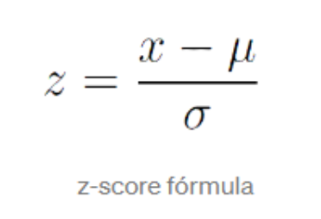

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(numeric_df)

StandardScaler()

In [ ]:
scaler.transform(numeric_df)

array([[ 1.71442958,  1.37649287,  9.73533453, ...,  0.23954854,
        13.02513104,  0.22167437],
       [ 0.43564649,  0.95539286,  7.13622036, ...,  0.23954854,
         9.71535012, -2.22540268],
       [ 2.67057382,  2.20985861,  4.03046978, ...,  2.76811642,
         1.11389676,  1.37899787],
       ...,
       [-0.6561573 , -0.66842934,  0.29836392, ...,  1.0824045 ,
         0.28534679,  0.07261059],
       [ 1.99515721,  2.20985861,  3.94024686, ...,  2.76811642,
         1.08517369,  1.37899787],
       [ 0.06421403, -0.10471904,  0.03116526, ...,  1.0824045 ,
         0.11521787, -0.08732908]])

In [ ]:
scaler.fit_transform(numeric_df)

array([[ 1.71442958,  1.37649287,  9.73533453, ...,  0.23954854,
        13.02513104,  0.22167437],
       [ 0.43564649,  0.95539286,  7.13622036, ...,  0.23954854,
         9.71535012, -2.22540268],
       [ 2.67057382,  2.20985861,  4.03046978, ...,  2.76811642,
         1.11389676,  1.37899787],
       ...,
       [-0.6561573 , -0.66842934,  0.29836392, ...,  1.0824045 ,
         0.28534679,  0.07261059],
       [ 1.99515721,  2.20985861,  3.94024686, ...,  2.76811642,
         1.08517369,  1.37899787],
       [ 0.06421403, -0.10471904,  0.03116526, ...,  1.0824045 ,
         0.11521787, -0.08732908]])

In [ ]:
scaled_data = scaler.transform(numeric_df)

A seguir, podemos analisar os valores das variáveis numéricas antes da padronização:

In [ ]:
numeric_df.head(3)

,Salario Mês,Media_Salarial,Tempo_de_Trabalho,Idade,Faixa_Etaria,Estagnação,Reconhecimento_Numerico,Reconhecimento_Medio,Feedback
0,7558.215,6605,6092,42,6,463,1.0,6092,8.757
1,4406.965,5604,4594,41,5,332,1.0,4594,8.332
2,9914.400,8586,2804,30,3,340,4.0,701,8.958


In [ ]:
scaled_data

array([[ 1.71442958,  1.37649287,  9.73533453, ...,  0.23954854,
        13.02513104,  0.22167437],
       [ 0.43564649,  0.95539286,  7.13622036, ...,  0.23954854,
         9.71535012, -2.22540268],
       [ 2.67057382,  2.20985861,  4.03046978, ...,  2.76811642,
         1.11389676,  1.37899787],
       ...,
       [-0.6561573 , -0.66842934,  0.29836392, ...,  1.0824045 ,
         0.28534679,  0.07261059],
       [ 1.99515721,  2.20985861,  3.94024686, ...,  2.76811642,
         1.08517369,  1.37899787],
       [ 0.06421403, -0.10471904,  0.03116526, ...,  1.0824045 ,
         0.11521787, -0.08732908]])

Agora, após a aplicação da padronização, podemos analisar os valores das variáveis numéricas padronizadas.

In [ ]:
#os scalers do Scikit-learn retornam listas numpy como resposta
#se quisermos acessar esses dados em forma de Dataframe, precisamos fazer a conversão:
numeric_df_scaled = pd.DataFrame(scaled_data, columns = numeric_df.columns)
numeric_df_scaled.head(3)

,Salario Mês,Media_Salarial,Tempo_de_Trabalho,Idade,Faixa_Etaria,Estagnação,Reconhecimento_Numerico,Reconhecimento_Medio,Feedback
0,1.714430,1.376493,9.735335,1.424789,1.704571,1.204905,0.239549,13.025131,0.221674
1,0.435646,0.955393,7.136220,1.300519,1.183212,0.535412,0.239549,9.715350,-2.225403
2,2.670574,2.209859,4.030470,-0.066452,0.140493,0.576297,2.768116,1.113897,1.378998


####3.4.1.2 - Normalização

A normalização é uma técnica de Min e Max, onde trata os dados deixando-os entre uma faixa de 0 a 1 ou de -1 a 1 (se tiverem valores negativos). 

Ela é recomendada para quando temos dados em uma distribuição não Gaussiana (conhecida também como distribuição normal), ou um desvio padrão muito pequeno. É recomendável também quando os limites de valores de atributos distintos são muito diferentes.


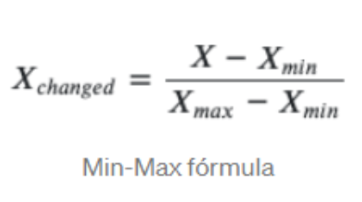

In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# scaler.fit(numeric_df)

In [ ]:
#print(scaler.numeric_df_max_)

In [ ]:
# scaler.transform(numeric_df)

In [ ]:
# scaler.fit_transform(numeric_df)

In [ ]:
# scaled_data = scaler.transform(numeric_df)

A seguir, podemos analisar os valores das variáveis numéricas antes da normalização:

In [ ]:
# numeric_df.head(3)

In [ ]:
scaled_data

array([[ 1.71442958,  1.37649287,  9.73533453, ...,  0.23954854,
        13.02513104,  0.22167437],
       [ 0.43564649,  0.95539286,  7.13622036, ...,  0.23954854,
         9.71535012, -2.22540268],
       [ 2.67057382,  2.20985861,  4.03046978, ...,  2.76811642,
         1.11389676,  1.37899787],
       ...,
       [-0.6561573 , -0.66842934,  0.29836392, ...,  1.0824045 ,
         0.28534679,  0.07261059],
       [ 1.99515721,  2.20985861,  3.94024686, ...,  2.76811642,
         1.08517369,  1.37899787],
       [ 0.06421403, -0.10471904,  0.03116526, ...,  1.0824045 ,
         0.11521787, -0.08732908]])

Agora, após a aplicação da normalização, podemos analisar os valores das variáveis numéricas normalizadas:

In [ ]:
#os scalers do Scikit-learn retornam listas numpy como resposta
#se quisermos acessar esses dados em forma de Dataframe, precisamos fazer a conversão:
# numeric_df_scaled = pd.DataFrame(scaled_data, columns = numeric_df.columns)
# numeric_df_scaled.head(3)

####3.4.2.3 - Comparação entre resultados dos dois métodos

A partir de testagens dos modelos, substituindo apenas a padronização pela normalização, sem mexer nos hiperparametros e features da época, através da avaliação de suas performances por meio dos critérios de acurácia e matriz de confusão, a aplicação da Padronização apresentou melhores resultados. Por isso, as cédulas de normalização estão comentadas.

Taxas de acurácia dos modelos com Padronização:

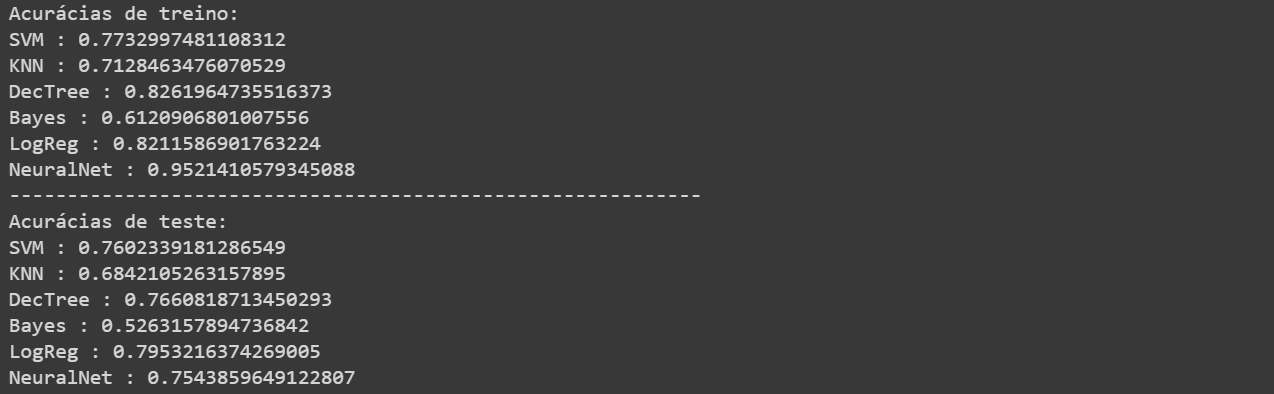

Taxas de acurácia com Normalização:

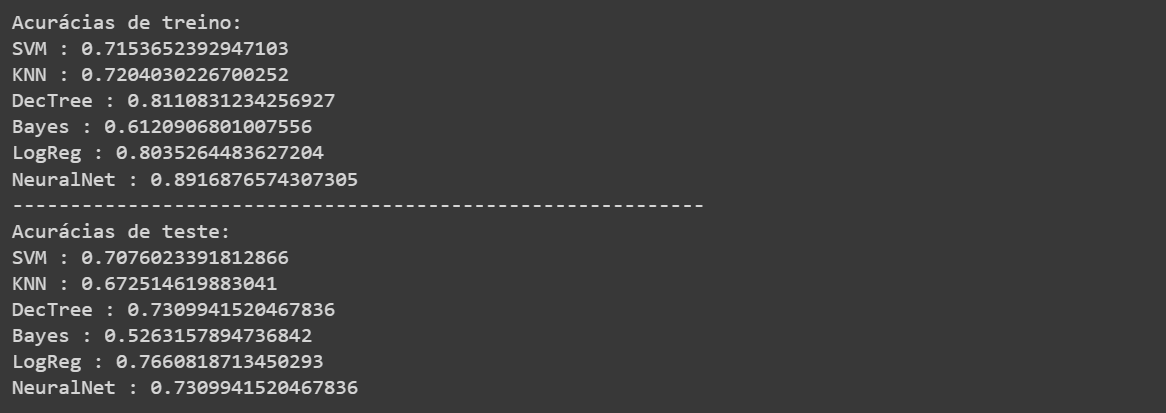

##3.5 - Criação da tabela final - df

Nesta seção, criaremos a o dataframe "df", que será o dataframe final utilizado para os modelos, e que contém os dados da:
- 'numeric_df_scaled': contém as variaveis numericas da df1 tratadas e normalizadas;
- 'cat_df': contém as variaveis categoricas da df1 tratadas e com one hot encoding aplicado;
- 'Status': feature da df1, que será o target do nosso modelo.

In [ ]:
df1.columns

Index(['Matricula', 'Nome Completo', 'Dt Admissao', 'Dt Saida', 'Tipo Saida',
       'Cargo', 'Salario Mês', 'Dt Nascimento', 'Genero', 'Etnia',
       'Estado Civil', 'Escolaridade ', 'Estado', 'Cidade', 'Area',
       'Genero_Numerico', 'Tipo_Saida_Numerico', 'Estado_Numerico', 'Regiao',
       'Regiao_Numerico', 'Cargo_Numerico', 'Area_Agrupada', 'Area_numerico',
       'Cidade_numerico', 'ECivil_Agrupado', 'ECivil_Numerico', 'Status',
       'Media_Salarial', 'Salario_Comparado', 'Tempo_de_Trabalho', 'Idade',
       'Faixa_Etaria', 'Estagnação', 'Reconhecimento_Numerico',
       'Reconhecimento_Medio', 'Feedback', 'estadoSP'],
      dtype='object')

In [ ]:
df = pd.DataFrame()
df = pd.concat([df1['Status'], numeric_df_scaled, cat_df], axis = 1)
df.columns

Index(['Status', 'Salario Mês', 'Media_Salarial', 'Tempo_de_Trabalho', 'Idade',
       'Faixa_Etaria', 'Estagnação', 'Reconhecimento_Numerico',
       'Reconhecimento_Medio', 'Feedback', 'Arquiteto', 'ArquitetoSr',
       'AssistenteI', 'AssistenteII', 'AuxiliardeLimpeza', 'ComercialIS',
       'ComercialPl', 'Consultor', 'DevEspecialista', 'DevJr', 'DevPl',
       'DevSr', 'Diretor', 'EducaçãoPl', 'Estagiaria', 'FinanceiroJr',
       'FuncionalEspecialista', 'FuncionalJr', 'FuncionalPl', 'FuncionalSr',
       'Gerente', 'GerenteCSSr', 'GerentePV', 'GerenteSr', 'GerenteVendasI',
       'GerenteVendasII', 'GerenteVendasIII', 'InfraestruturaJr',
       'MarketingPL', 'PessoasPl', 'ScrumMasterJr', 'TesteJr', 'TesteSr',
       'Trainee-Dev', 'Trainee-Funcional', 'VicePresidente', 'AMS&PS',
       'Analytics&Integration', 'CPG&Retail', 'CPG&RetailII', 'Commerce',
       'Core&Industrias', 'Everymind', 'MktCloud', 'PS', 'People&Culture',
       'Vendas', 'BA', 'CE', 'DF', 'GO', 'MA', 'MG', '

In [ ]:
df.head(5)

,Status,Salario Mês,Media_Salarial,Tempo_de_Trabalho,Idade,Faixa_Etaria,Estagnação,Reconhecimento_Numerico,Reconhecimento_Medio,Feedback,...,Solteiro,Feminino,Masculino,centro,nordeste,norte,sudeste,sul,Salario_Comparado,estadoSP
0,1,1.714430,1.376493,9.735335,1.424789,1.704571,1.204905,0.239549,13.025131,0.221674,...,0,1,0,0,0,0,1,0,0,1
1,0,0.435646,0.955393,7.136220,1.300519,1.183212,0.535412,0.239549,9.715350,-2.225403,...,1,0,1,0,0,0,1,0,1,1
2,1,2.670574,2.209859,4.030470,-0.066452,0.140493,0.576297,2.768116,1.113897,1.378998,...,1,0,1,0,0,0,1,0,0,1
3,1,2.670574,2.442074,3.922896,0.430628,0.661852,0.576297,2.768116,1.078545,0.221674,...,1,0,1,0,0,0,1,0,0,1
4,0,0.538544,0.516204,3.629672,-0.190722,-0.380867,0.489416,1.082404,2.406435,0.716848,...,1,0,1,0,0,0,1,0,0,1


# 4.0 - Análise de Features
Nesta seção, vamos fazer uma nova análise de dados. Contudo, dessa vez, ela será direcionada para as features que criamos ao longo do tratamento de dados (desda 3.2 - Categorização, até a 3.3 - Derivação). Isso permite que façamos uma boa escolha de variáveis para o modelo analisar quando for testado posteriormente na seção 5.

## 4.1 - Análise Estatística de Features
Primeiro, uma análise estatística das features criadas com o apoio de gráficos. Isso é importante para aprimora nosso poder de decisão de feature na próxima seção (4.2 - Escolha das Features).

### 4.1.1 - Saída por estado 

In [ ]:
Estado_total = df1.groupby(['estadoSP']).count()

In [ ]:
total_foraSP = Estado_total.iloc[0, 1]
total_foraSP

118

In [ ]:
total_emSP = Estado_total.iloc[1, 1]
total_emSP

357

In [ ]:
total_foraSP_off = Estado_total.iloc[0, 4]
total_foraSP_off

35

In [ ]:
total_emSP_off = Estado_total.iloc[1, 4]
total_emSP_off

156

In [ ]:
emSP_prop = (total_emSP_off/total_emSP)*100
emSP_prop

43.69747899159664

In [ ]:
foraSP_prop = (total_foraSP_off/total_foraSP)*100
foraSP_prop

29.66101694915254

Text(0.5, 1.0, 'Desligamentos x cidade (proporcionalmente)')

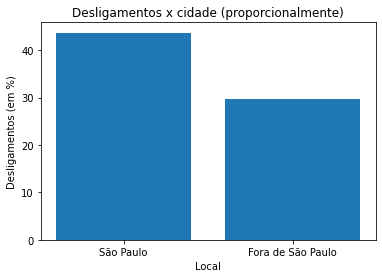

In [ ]:
est_x = ['São Paulo', 'Fora de São Paulo']
est_y = [emSP_prop,foraSP_prop]

plt.bar(est_x, est_y)

plt.xlabel('Local')
plt.ylabel('Desligamentos (em %)')
plt.title('Desligamentos x cidade (proporcionalmente)')

## 4.2 - Escolha das Features
Aqui finalmente escolhemos nossas features, começamos com uma análise macroscópica com a matriz de correlação das features em relação ao Status (nosso target no modelo) e, depois, uma análise individual com o apoio de gráficos para as outras variáveis.

In [ ]:
matriz_corr = df1.corr().style.background_gradient(cmap='coolwarm')
target_corr = matriz_corr.data.Status
df_corr = target_corr.abs().sort_values(ascending=False).to_frame().style.background_gradient(cmap='coolwarm')
df_corr

,Status
Status,1.000000
Tipo_Saida_Numerico,0.950291
Matricula,0.496784
Salario_Comparado,0.316975
Cargo_Numerico,0.305136
Reconhecimento_Numerico,0.125633
estadoSP,0.123696
Genero_Numerico,0.101510
Estado_Numerico,0.091512
Faixa_Etaria,0.081638


In [ ]:
matriz_corr = df.corr().style.background_gradient(cmap='coolwarm')
target_corr = matriz_corr.data.Status
df_corr = target_corr.abs().sort_values(ascending=False).to_frame().style.background_gradient(cmap='coolwarm')
df_corr

,Status
Status,1.000000
Salario_Comparado,0.316975
Trainee-Dev,0.248352
DevPl,0.216092
Core&Industrias,0.171740
Reconhecimento_Numerico,0.125633
CPG&Retail,0.124058
SP,0.123696
estadoSP,0.123696
MktCloud,0.119437


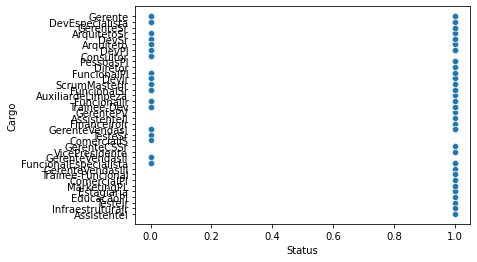

In [ ]:
sns.scatterplot(data = df1, x = 'Status', y = 'Cargo')

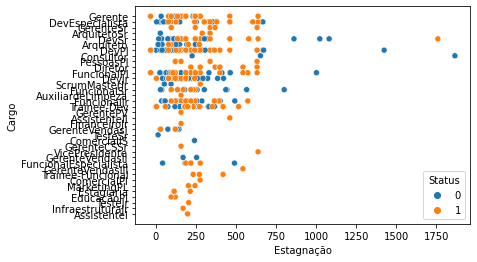

In [ ]:
sns.scatterplot(data = df1, x = 'Estagnação', y = 'Cargo', hue = 'Status')

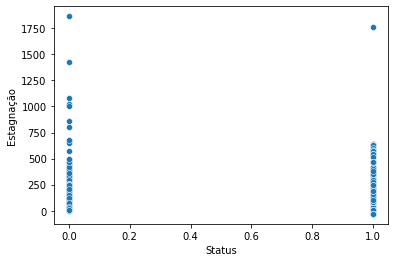

In [ ]:
sns.scatterplot(data = df1, x = 'Status', y = 'Estagnação')

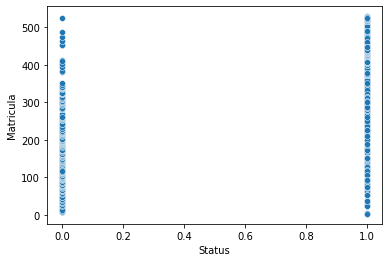

In [ ]:
sns.scatterplot(data = df1, x = 'Status', y = 'Matricula')

In [ ]:
df1['Status'].value_counts()

1    284
0    191
Name: Status, dtype: int64

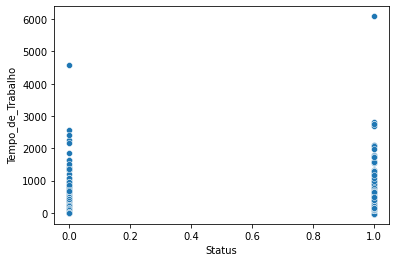

In [ ]:
sns.scatterplot(data = df1, x = 'Status', y = 'Tempo_de_Trabalho')

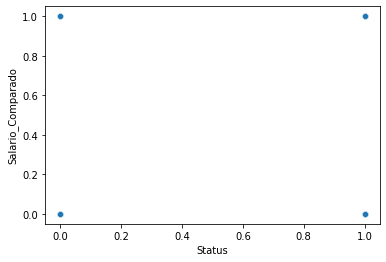

In [ ]:
sns.scatterplot(data = df1, x = 'Status', y = 'Salario_Comparado')

#5.0 - Pré-modelagem

##5.1 - divisão/preparação do dataset

Nessa etapa inicial, escolhemos a features a serem utilizadas no modelo (variavel "x"), e a variável alvo ("y")

In [ ]:
df1.columns

Index(['Matricula', 'Nome Completo', 'Dt Admissao', 'Dt Saida', 'Tipo Saida',
       'Cargo', 'Salario Mês', 'Dt Nascimento', 'Genero', 'Etnia',
       'Estado Civil', 'Escolaridade ', 'Estado', 'Cidade', 'Area',
       'Genero_Numerico', 'Tipo_Saida_Numerico', 'Estado_Numerico', 'Regiao',
       'Regiao_Numerico', 'Cargo_Numerico', 'Area_Agrupada', 'Area_numerico',
       'Cidade_numerico', 'ECivil_Agrupado', 'ECivil_Numerico', 'Status',
       'Media_Salarial', 'Salario_Comparado', 'Tempo_de_Trabalho', 'Idade',
       'Faixa_Etaria', 'Estagnação', 'Reconhecimento_Numerico',
       'Reconhecimento_Medio', 'Feedback', 'estadoSP'],
      dtype='object')

In [ ]:
cat_df.columns

Index(['Arquiteto', 'ArquitetoSr', 'AssistenteI', 'AssistenteII',
       'AuxiliardeLimpeza', 'ComercialIS', 'ComercialPl', 'Consultor',
       'DevEspecialista', 'DevJr', 'DevPl', 'DevSr', 'Diretor', 'EducaçãoPl',
       'Estagiaria', 'FinanceiroJr', 'FuncionalEspecialista', 'FuncionalJr',
       'FuncionalPl', 'FuncionalSr', 'Gerente', 'GerenteCSSr', 'GerentePV',
       'GerenteSr', 'GerenteVendasI', 'GerenteVendasII', 'GerenteVendasIII',
       'InfraestruturaJr', 'MarketingPL', 'PessoasPl', 'ScrumMasterJr',
       'TesteJr', 'TesteSr', 'Trainee-Dev', 'Trainee-Funcional',
       'VicePresidente', 'AMS&PS', 'Analytics&Integration', 'CPG&Retail',
       'CPG&RetailII', 'Commerce', 'Core&Industrias', 'Everymind', 'MktCloud',
       'PS', 'People&Culture', 'Vendas', 'BA', 'CE', 'DF', 'GO', 'MA', 'MG',
       'MS', 'PA', 'PB', 'PE', 'PR', 'RJ', 'RN', 'RS', 'SC', 'SE', 'SP',
       'Casado', 'Solteiro', 'Feminino', 'Masculino', 'centro', 'nordeste',
       'norte', 'sudeste', 'sul', 'Sala

In [ ]:
numeric_df.columns

Index(['Salario Mês', 'Media_Salarial', 'Tempo_de_Trabalho', 'Idade',
       'Faixa_Etaria', 'Estagnação', 'Reconhecimento_Numerico',
       'Reconhecimento_Medio', 'Feedback'],
      dtype='object')

In [ ]:
df.columns

Index(['Status', 'Salario Mês', 'Media_Salarial', 'Tempo_de_Trabalho', 'Idade',
       'Faixa_Etaria', 'Estagnação', 'Reconhecimento_Numerico',
       'Reconhecimento_Medio', 'Feedback', 'Arquiteto', 'ArquitetoSr',
       'AssistenteI', 'AssistenteII', 'AuxiliardeLimpeza', 'ComercialIS',
       'ComercialPl', 'Consultor', 'DevEspecialista', 'DevJr', 'DevPl',
       'DevSr', 'Diretor', 'EducaçãoPl', 'Estagiaria', 'FinanceiroJr',
       'FuncionalEspecialista', 'FuncionalJr', 'FuncionalPl', 'FuncionalSr',
       'Gerente', 'GerenteCSSr', 'GerentePV', 'GerenteSr', 'GerenteVendasI',
       'GerenteVendasII', 'GerenteVendasIII', 'InfraestruturaJr',
       'MarketingPL', 'PessoasPl', 'ScrumMasterJr', 'TesteJr', 'TesteSr',
       'Trainee-Dev', 'Trainee-Funcional', 'VicePresidente', 'AMS&PS',
       'Analytics&Integration', 'CPG&Retail', 'CPG&RetailII', 'Commerce',
       'Core&Industrias', 'Everymind', 'MktCloud', 'PS', 'People&Culture',
       'Vendas', 'BA', 'CE', 'DF', 'GO', 'MA', 'MG', '

In [ ]:
x = df.drop(['Status'], axis = 1)
y = df['Status']

###5.1.2 - Oversampling e Undersampling

Ainda com o intuito de preparar os dados e equilibrá-los para o modelo, aplicamos as técnicas de Oversampling e Undersampling, que fazem com que a quantidade de colaboradores que saíram da empresa seja a mesma de colaboradores que não saíram. Essas técnicas são importantissimas para o balanceamento e para evitar viéses nos modelos, e, especialmente no contexto de uma base de dados muito pequena como a utilizada, o Oversampling se mostra essencial para aumentá-la.

 Nesse sentido, dentre as técnicas mais comuns de oversampling e undersampling - comentadas nas cédulas abaixo - a que mais se encaixa no contexto do nosso modelo, e que apresentou melhor desempenho foi o 'SMOTE'.

In [ ]:
# #UNDERSAMPLING - não vamos usar

# # Random Undersampler <-
# rus = RandomUnderSampler(random_state = 32)
# X_rus_res, y_rus_res = rus.fit_resample(x, y)

# # NearMiss
# nm = NearMiss(version=1)
# X_nm_res, y_nm_res = nm.fit_resample(x, y)

# # OneSidedSelection (Algoritmo tipo KNN)
# oss = OneSidedSelection(random_state = 32)
# X_oss_res, y_oss_res = oss.fit_resample(x, y)

O SMOTE é uma tecnica de oversampling que se mostra mais precisa e adequada que o 'Random Oversampler', visto que ajuda a resolver o problema de overfitting muitas vezes gerado pelo Random.

In [ ]:
#OVERSAMPLING

# Random Oversampler
# ros = RandomOverSampler(random_state = 32)
# X_ros_res, y_ros_res = ros.fit_resample(x, y)

# SMOTE -> melhor resultados
smote = SMOTE(random_state = 32)
x_smote_res, y_smote_res = smote.fit_resample(x, y)

###5.1.3 - divisão dos conjuntos de teste e treino

In [ ]:
#divisão dos dados de teste e de treino
x_train, x_test, y_train, y_test = train_test_split(x_smote_res,
                                                            y_smote_res,
                                                            test_size=0.3,
                                                            random_state=32)


# 6.0 - Modelagem

Realizamos experimentos que englobam 6 tipos de modelos que consideramos válidos e com potencial para o nosso projeto de predição de classificação: 
- SVM (Support-Vector Machine)
- KNN (K-Nearest Neighbors)
- Árvore de Decisão
- Naive Bayes
- Regressão Logística
- Redes Neurais

Diante disso, após as testagens dos modelos, o modelo de Árvore de Decisão apresentou a melhor performance entre os modelos (a partir das métricas de avaliação utilizadas), e foi escolhido como modelo final do projeto.

## Árvore de decisão - Modelo Final

A árvore de decisão é uma das técnicas mais populares de mineração, principalmente para a tarefa de classificação, e consiste em uma coleção de nós internos e nós folhas, organizados em um modelo hierárquico. 

Nesse sentido, assim como apresentado na imagem a baixo, os nós internos representam os atributos descritivos do modelo, as subárvores saem de cada nó interno, e contém os possíveis valores do seu nó raiz, e os nós folha representam uma decisão sugerida pelo modelo (rótulos).
Basicamente, uma árvore de decisão se ramifica em diversas escolhas que podem ser tomadas, que levam a outras escolhas, até chegar em um rótulo.


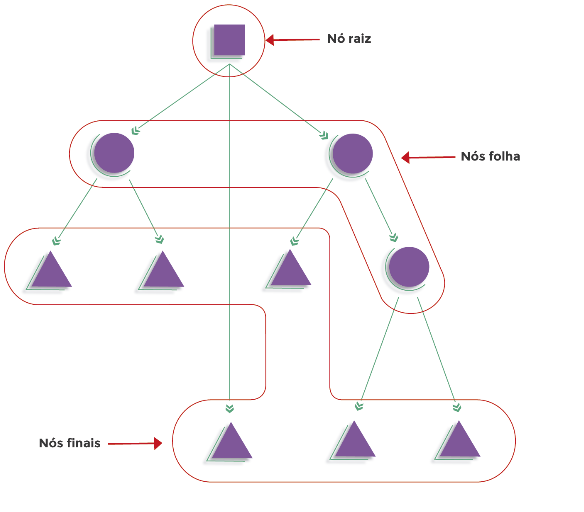

###6.1 - Algoritmo

Nessa etapa, aplicamos o algoritmo de Árvore de Decisão, através da função DecisionTreeClassifier, em que definimos hiperparametros- a partir de análises feitas com o Random Search, Grid Search e testagens, que serão apresentados nos tópicos 6.3.4, 6.3.5 e 6.3.6 deste Notebook.

Hiperparâmetros definidos fora do default:
- **Min_samples_split**: o menor número de amostras para dividir um nó interno; 
- **Min_samples_leaf**: o menor número de amostras para estar em uma folha; 
- **max_depth**: A profundidade da árvore; se mostrou essencial a definição de um valor baixo, visto que valores altos levavam ao overfitting;
- **criterion**: mede a qualidade de uma subdivisão da árvore


In [ ]:
arv = DecisionTreeClassifier(random_state=32,
                             criterion = 'gini',
                             max_depth = 7,
                             min_samples_leaf = 1,
                             min_samples_split = 3,
                             )
arv.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=7, min_samples_split=3, random_state=32)

In [ ]:
(y_train).value_counts()
(y_test).value_counts()

1    90
0    81
Name: Status, dtype: int64

In [ ]:
p = arv.predict(x_test)
p_1 = arv.predict(x_train)

### 6.2 - Avaliação das predições

#### 6.2.1 - Acurácia

In [ ]:
print('Acurácia (treino): ', arv.score( x_train, y_train))
print('Acurácia (teste): ', arv.score( x_test, y_test))

Acurácia (treino):  0.8992443324937027
Acurácia (teste):  0.8538011695906432


#### 6.2.2 - Matriz de Confusão

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



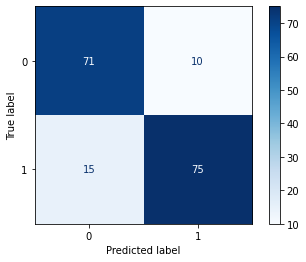

In [ ]:
plot_confusion_matrix(arv, x_test, y_test, cmap='Blues', values_format='.0f',)

#### 6.2.3 - Curva ROC

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.



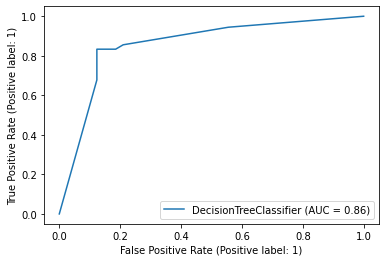

In [ ]:
plot_roc_curve(arv ,x_test, y_test)

### 6.3 - Visualização da Árvore criada

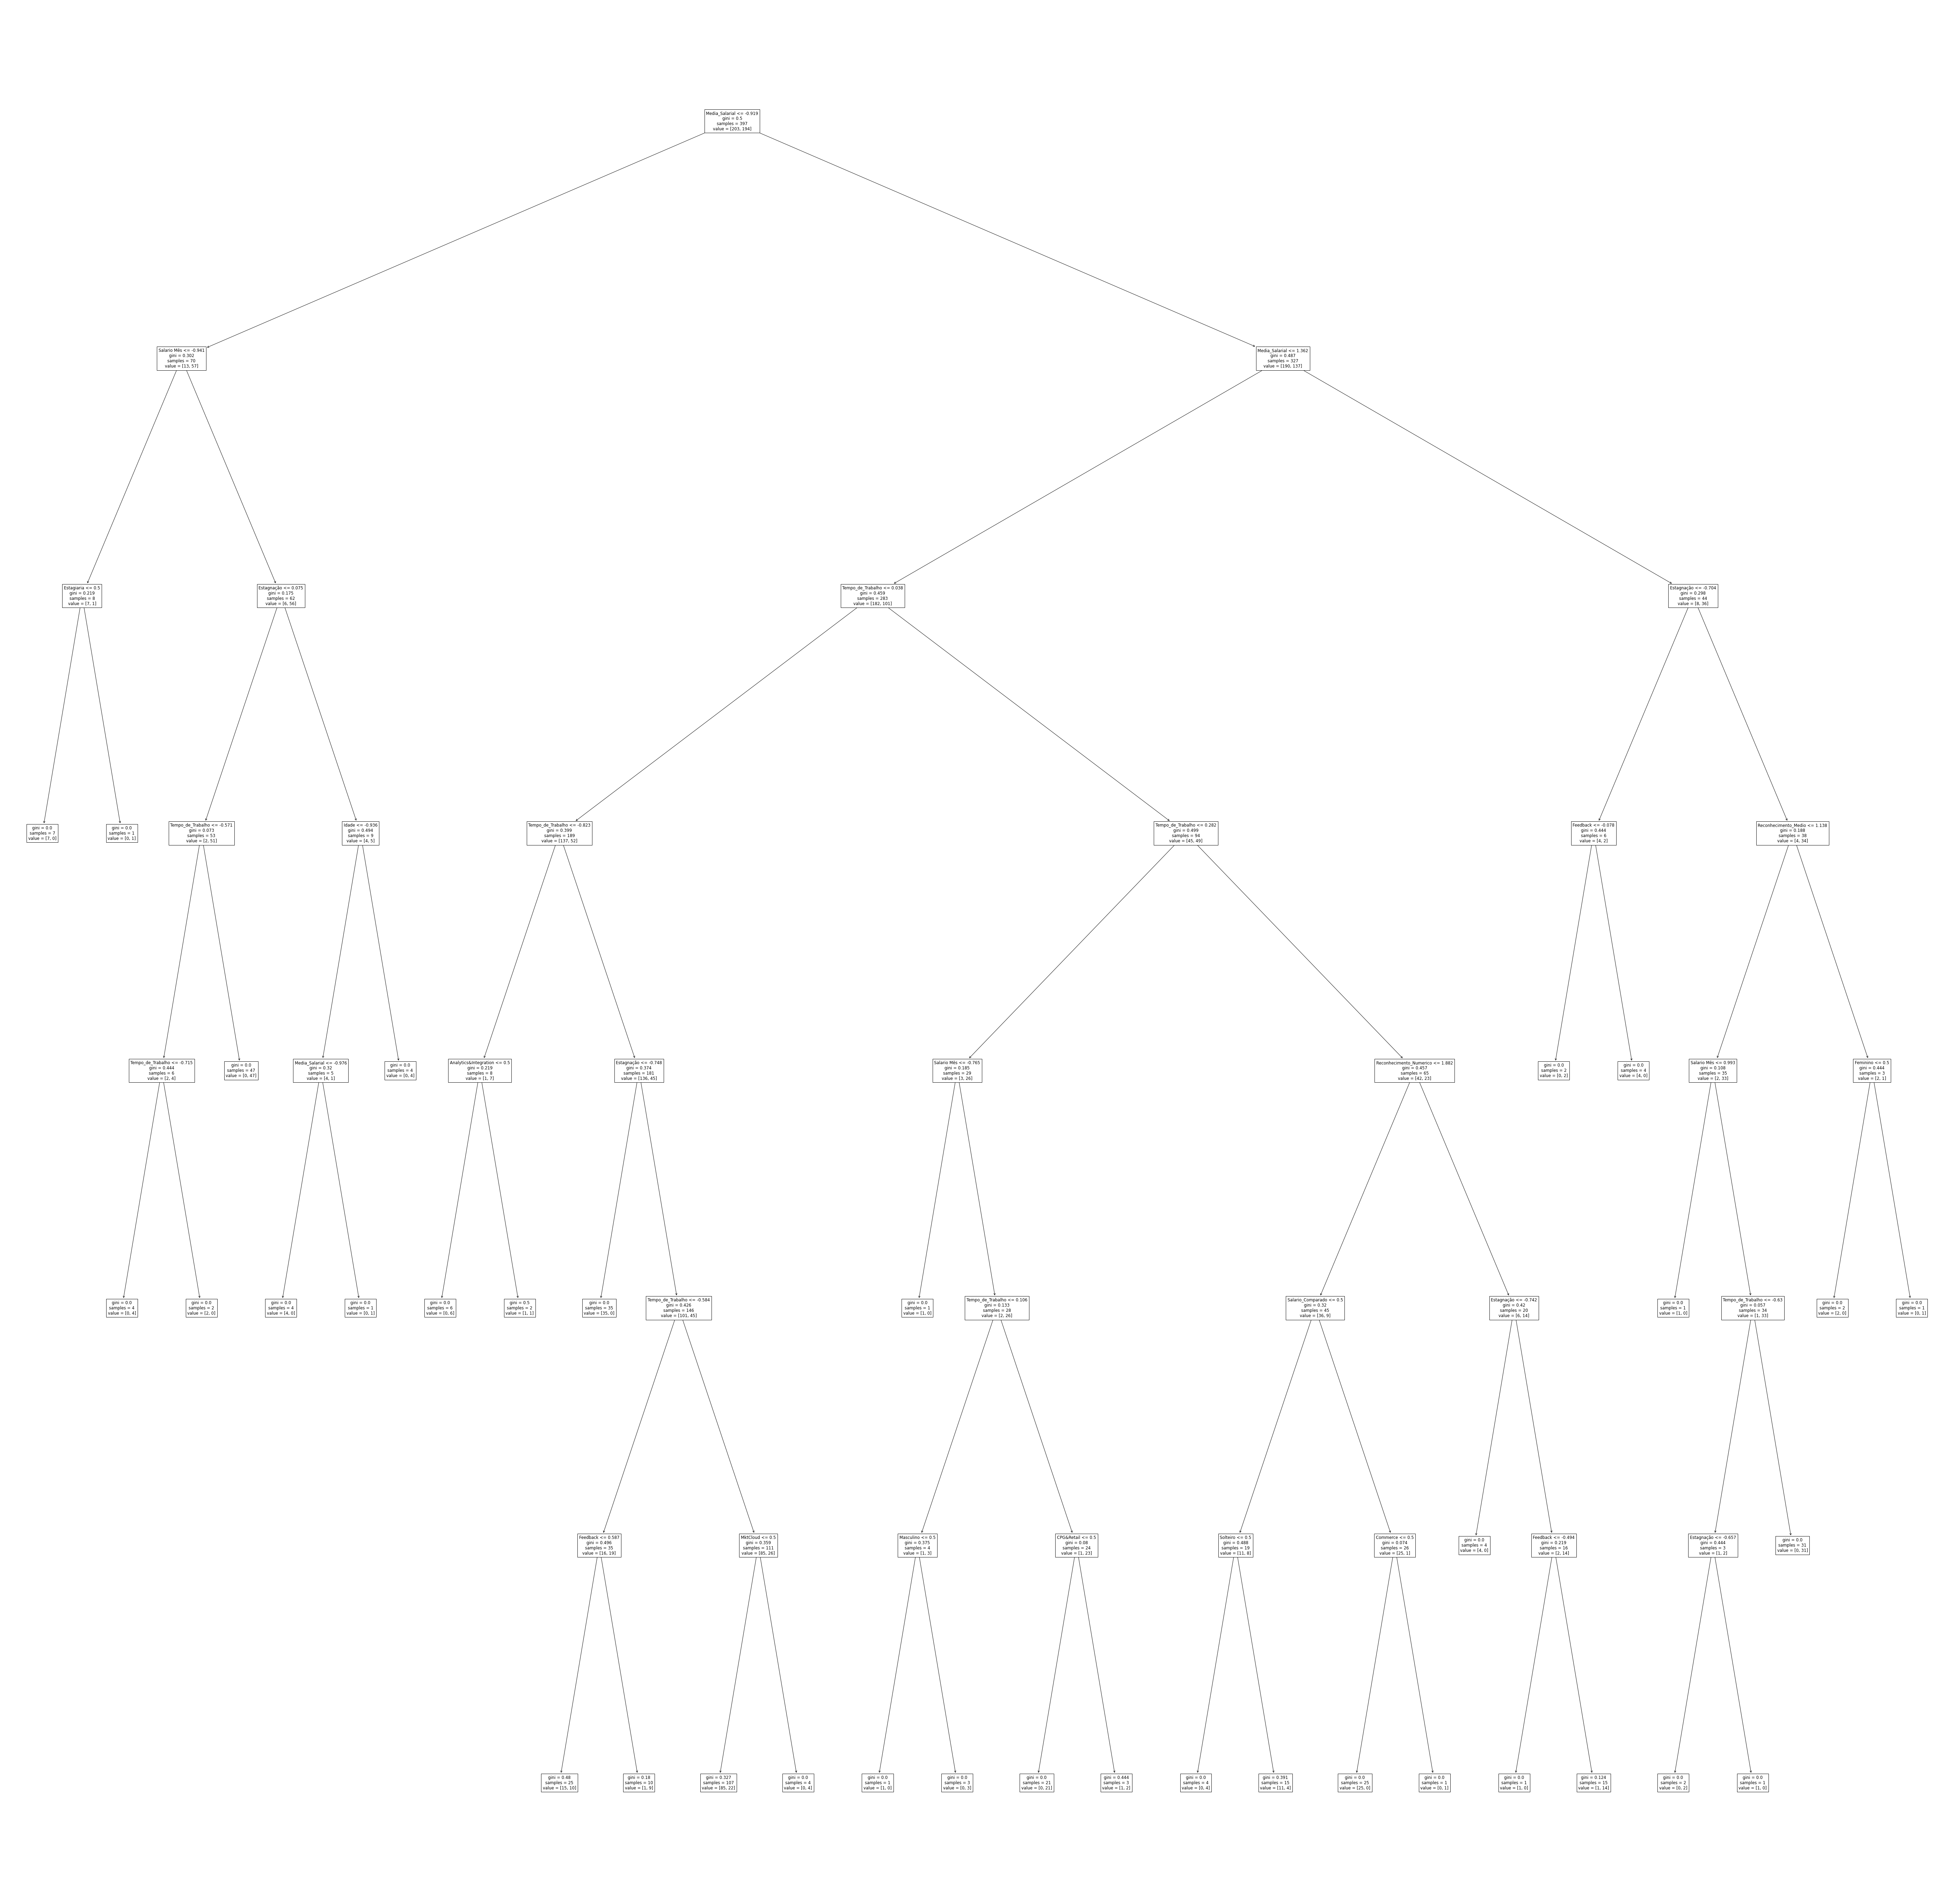

In [ ]:
 fig, ax = plt.subplots(figsize=(100, 100))
 _ = plot_tree(arv, feature_names = x.columns)